In [6]:
import os
import sys
import tyro
import time
import random
import warnings

import numpy as np
import torch

oc_atari_dir = os.getenv("OC_ATARI_DIR")

if oc_atari_dir is not None:
    a = os.path.join(Path(__file__), oc_atari_dir)
    sys.path.insert(1, a)

sys.path.append("..")
has_agent= False

In [15]:
env_id = "ALE/Pong-v5"
obs_mode = "obj"
pth = "/data/oc_cleanrl/cleanrl/wandb/run-20241010_060604-pzk9e36i/files/DQNLv2.cleanrl_model"
architecture = "DQNLv2"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    

In [16]:
from ocatari.core import OCAtari
env = OCAtari(
    env_id, hud=False, render_mode="rgb_array",
        render_oc_overlay=False, obs_mode=obs_mode,
        # logger=logger, feature_func=feature_func,
        # buffer_window_size=window_size
)

obs, info = env.reset()

if architecture == "OCT":
    from architectures.transformer import OCTransformer as Agent
    agent = Agent(env, emb_dim, num_heads, num_blocks, device).to(device)
elif architecture == "VIT":
    from architectures.transformer import VIT as Agent
    agent = Agent(env, emb_dim, num_heads, num_blocks,
                    patch_size, buffer_window_size, device).to(device)
elif architecture == "VIT2":
    from architectures.transformer import SimpleViT2 as Agent
    agent = Agent(env, emb_dim, num_heads, num_blocks,
                    patch_size, buffer_window_size, device).to(device)
elif architecture == "MobileVit":
    from architectures.transformer import MobileVIT as Agent
    agent = Agent(env, emb_dim, num_heads, num_blocks,
                    patch_size, buffer_window_size, device).to(device)
elif architecture == "MobileVit2":
    from architectures.transformer import MobileViT2 as Agent
    agent = Agent(env, emb_dim, num_heads, num_blocks,
                    patch_size, buffer_window_size, device).to(device)
elif architecture == "PPO":
    from architectures.ppo import PPODefault as Agent
    agent = Agent(env, device).to(device)
else:
    from architectures.ppo import PPO_Obj as Agent
    agent = Agent(env, device).to(device)


Using OBJ State Representation


In [17]:
ckpt = torch.load(pth, map_location=torch.device('cpu'))
agent.load_state_dict(ckpt["model_weights"])
has_agent = True 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
def print_obs(obs):
    
    # Display the array as an image
    plt.imshow(obs, cmap='gray')  # Use 'gray' colormap for 2D arrays
    plt.axis('off')
    plt.show()  

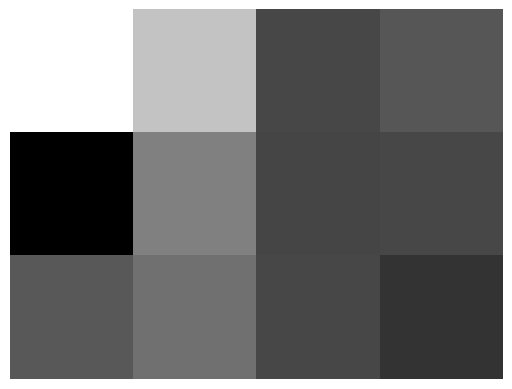

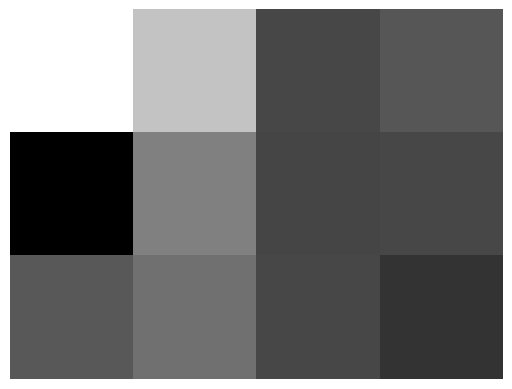

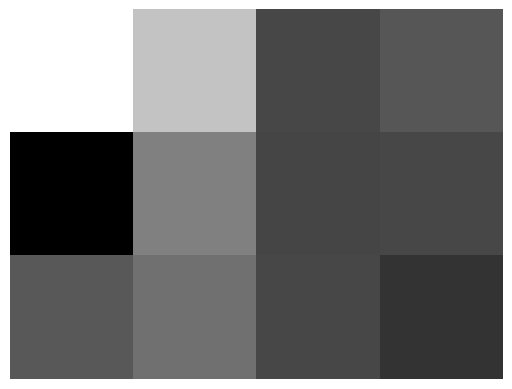

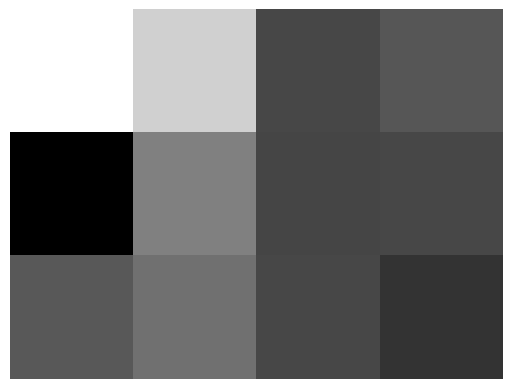

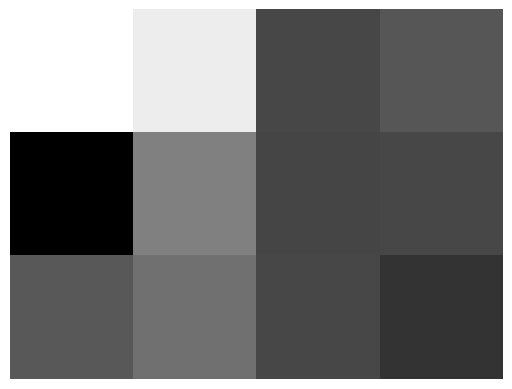

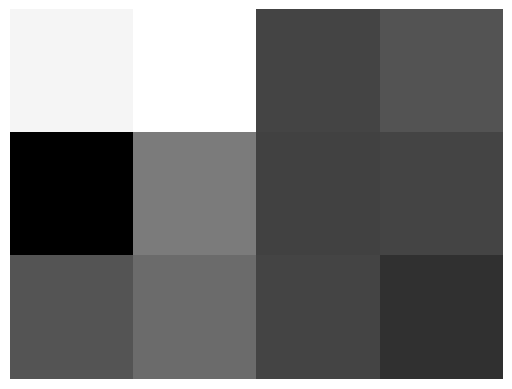

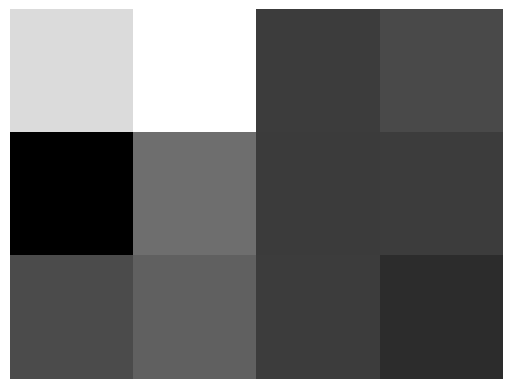

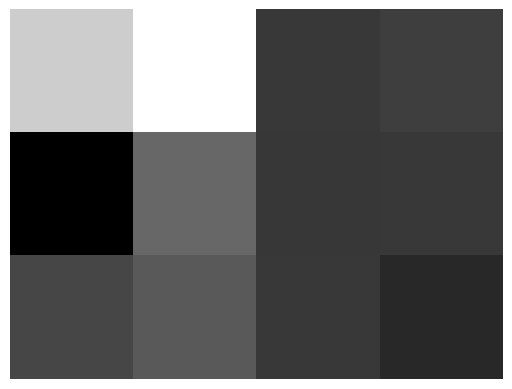

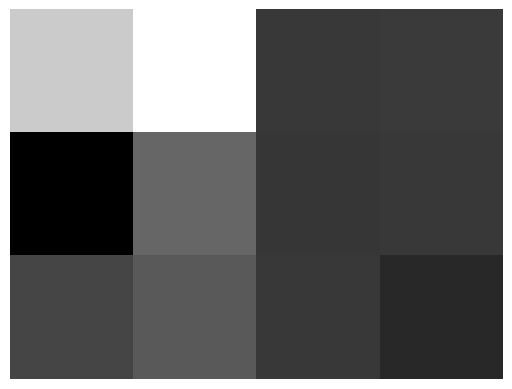

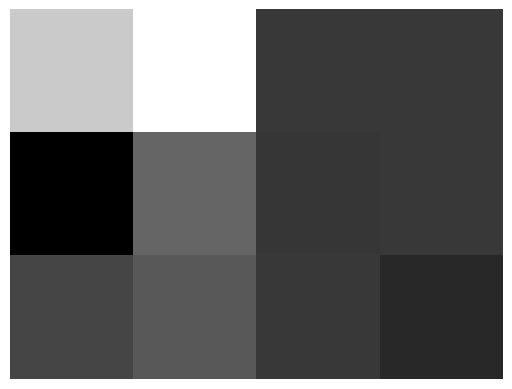

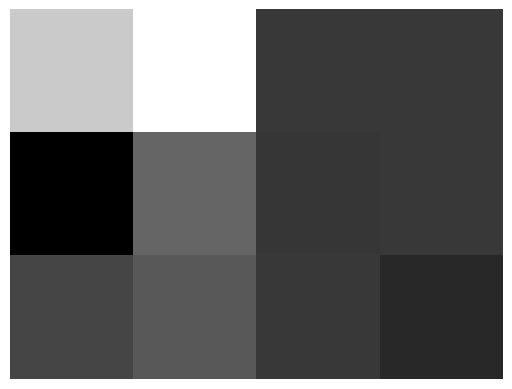

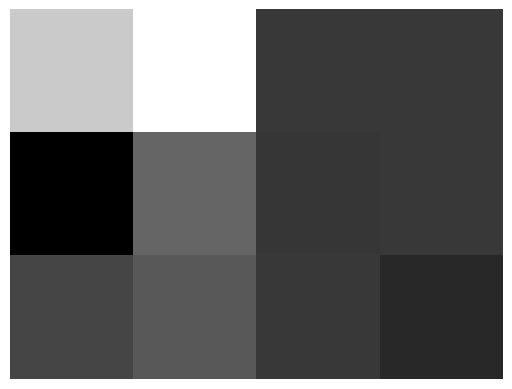

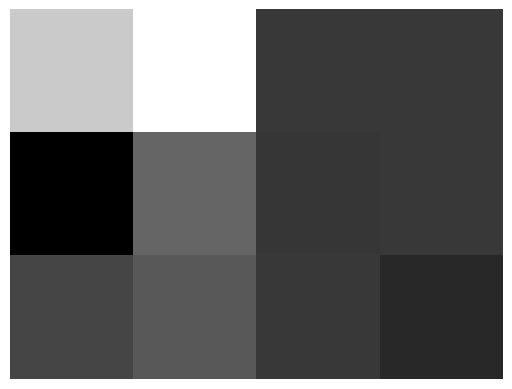

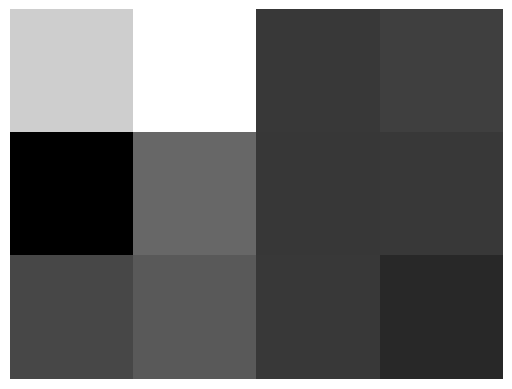

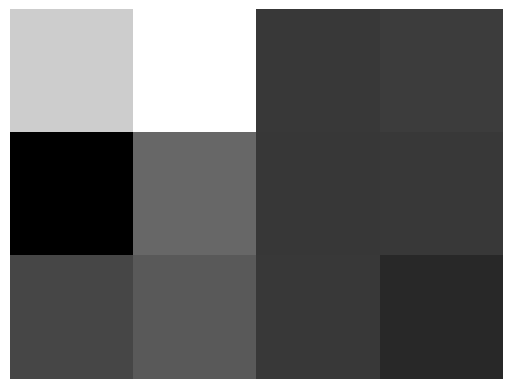

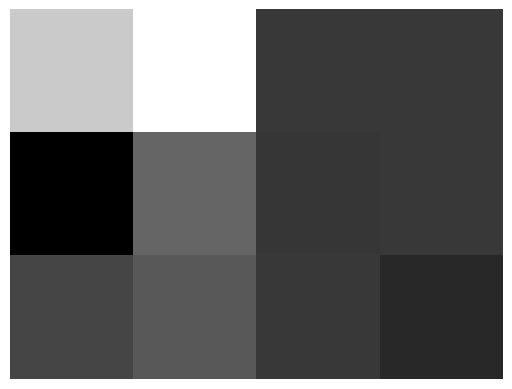

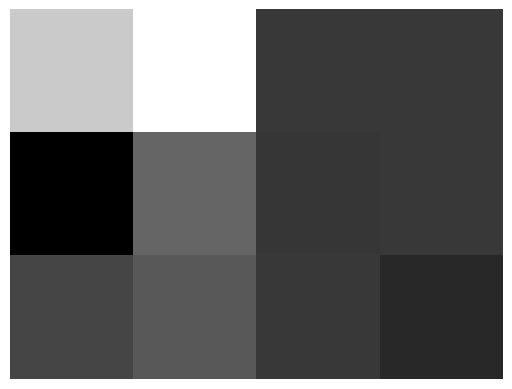

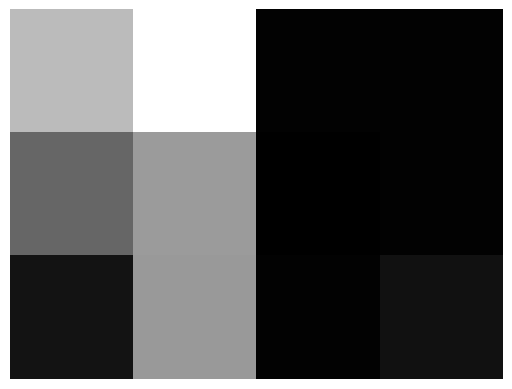

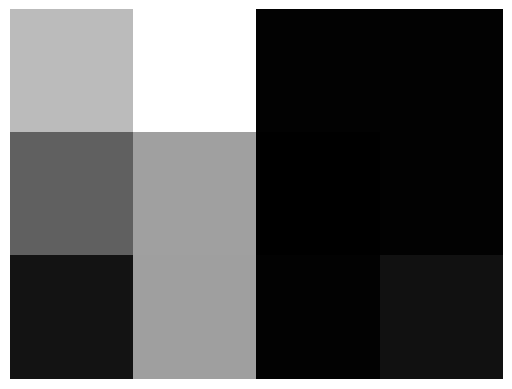

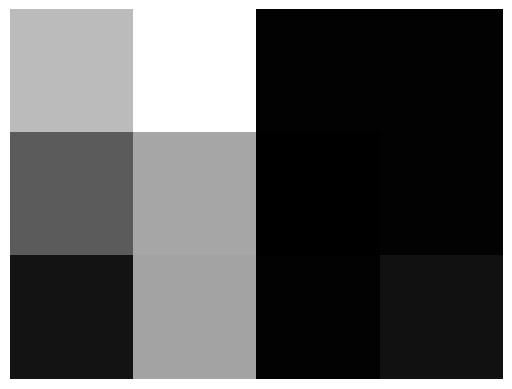

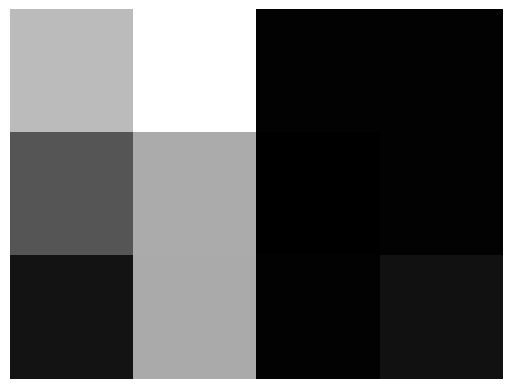

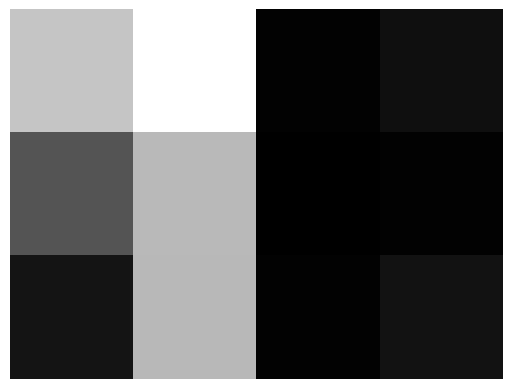

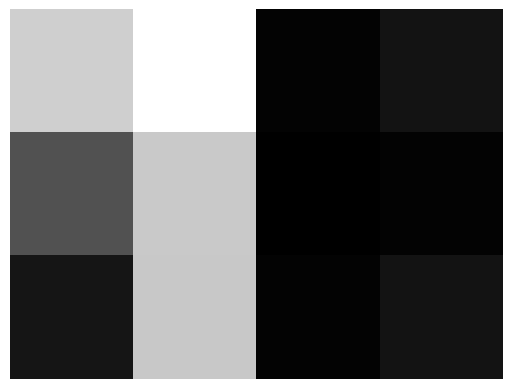

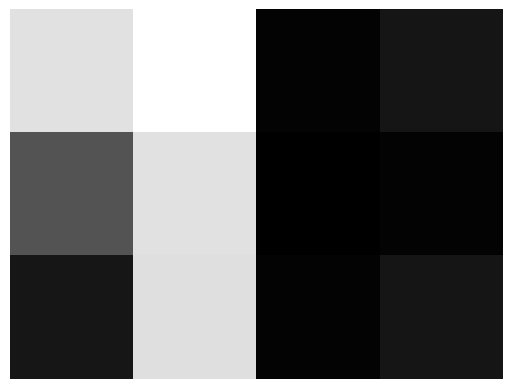

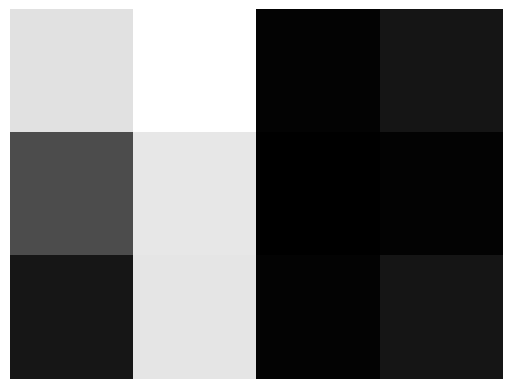

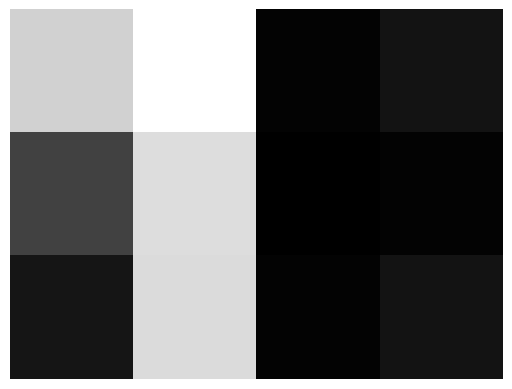

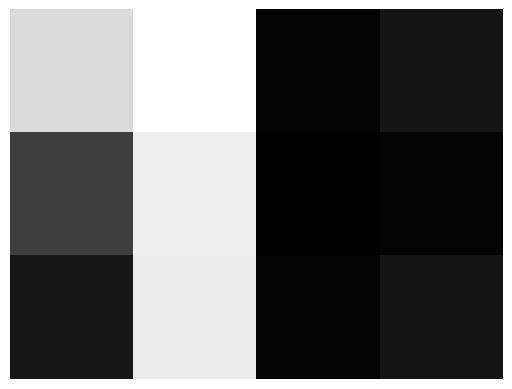

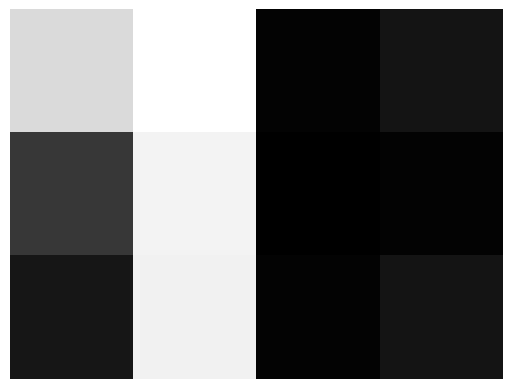

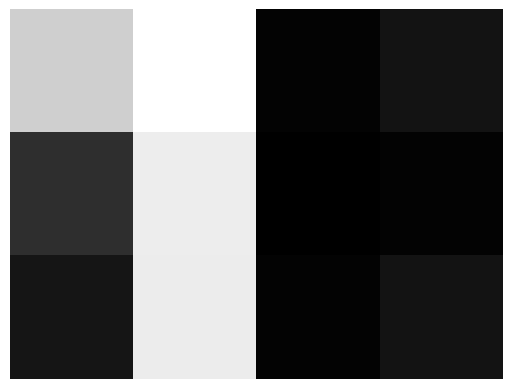

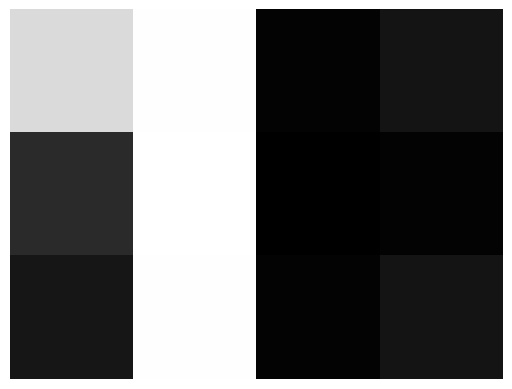

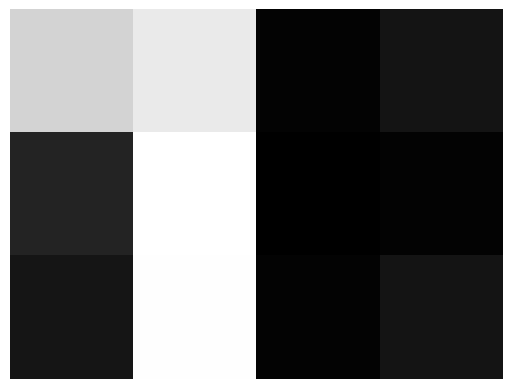

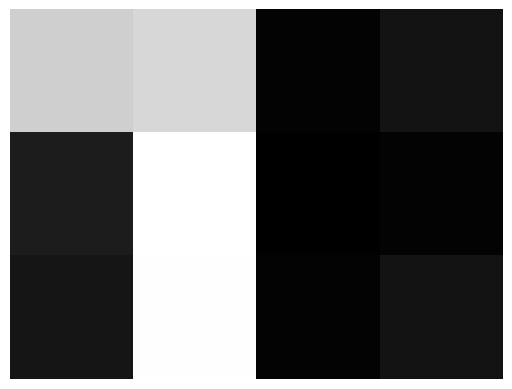

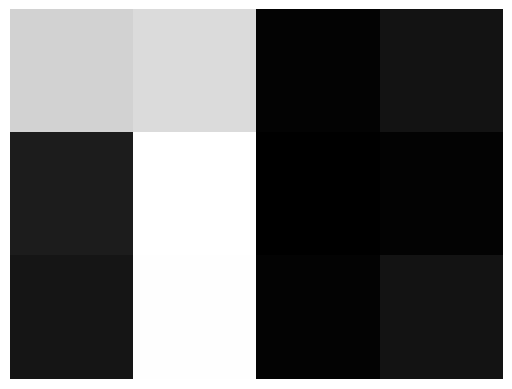

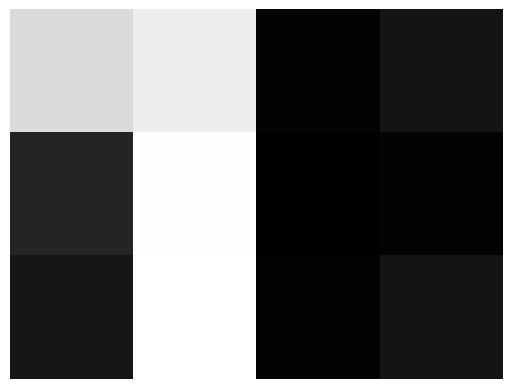

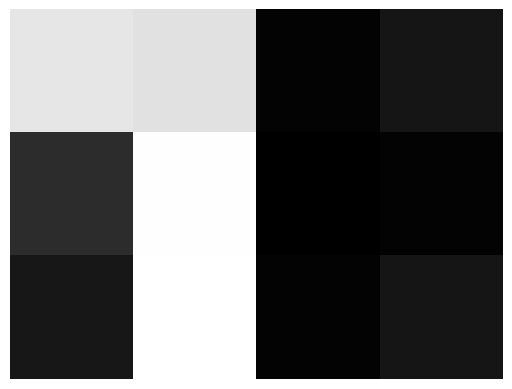

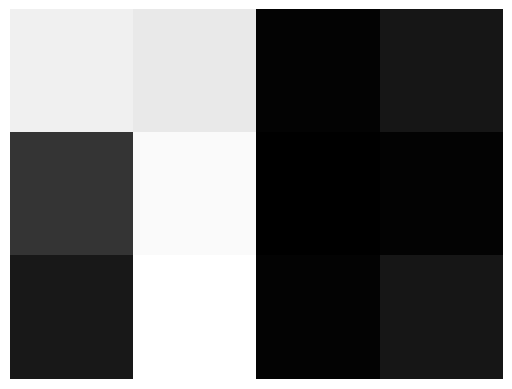

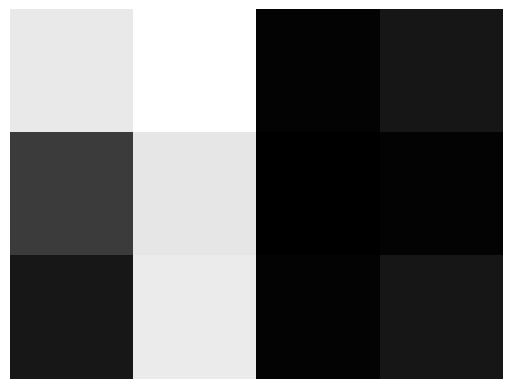

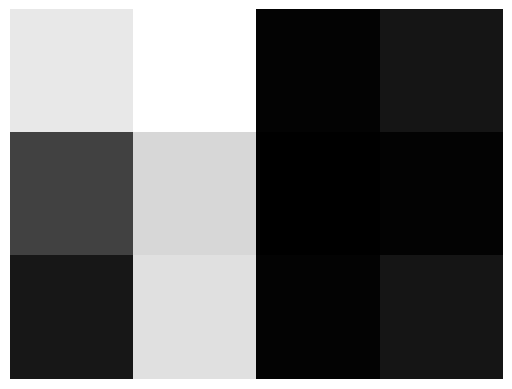

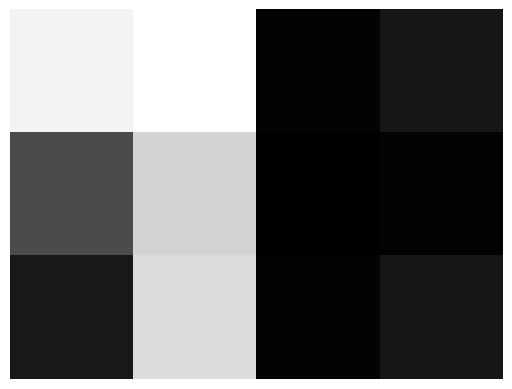

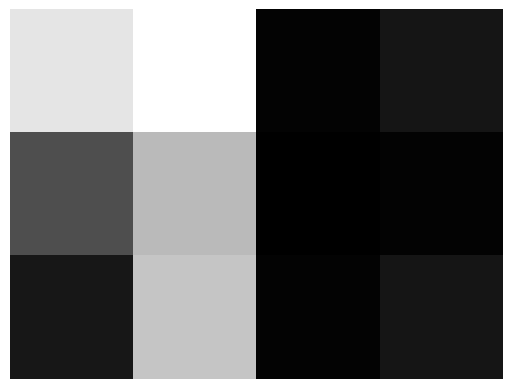

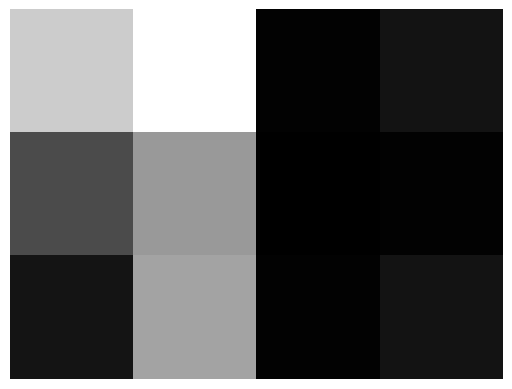

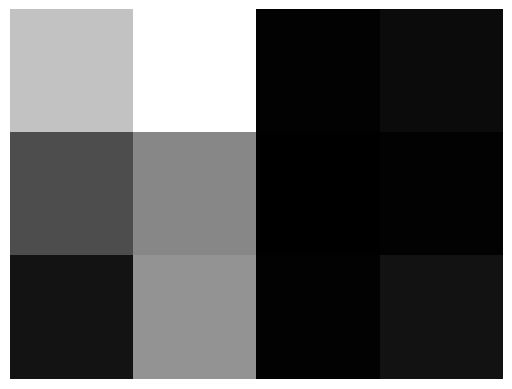

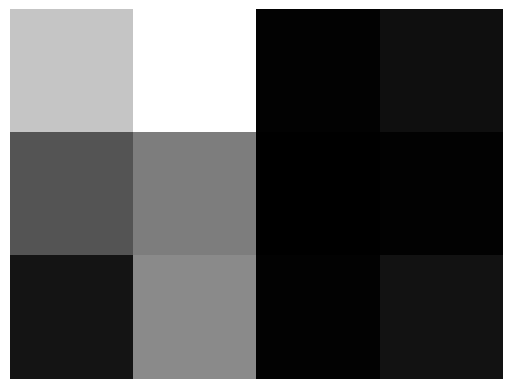

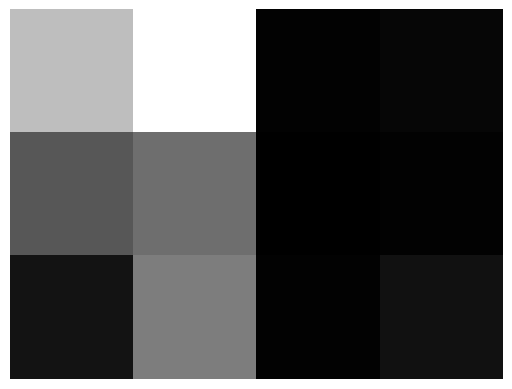

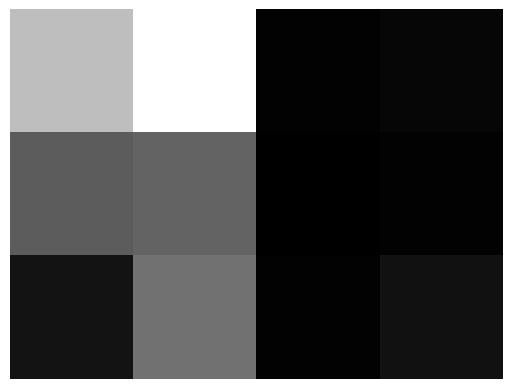

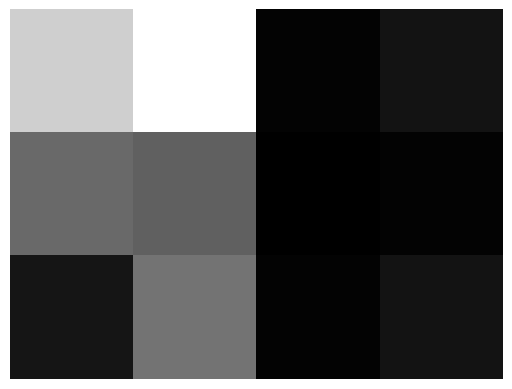

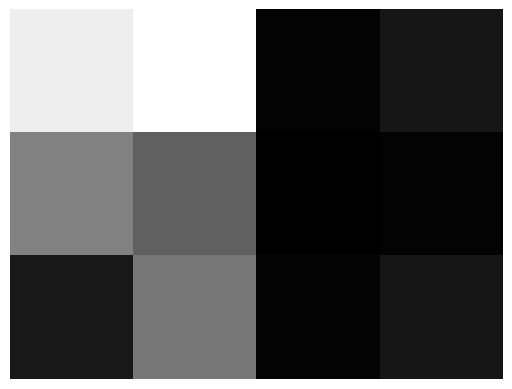

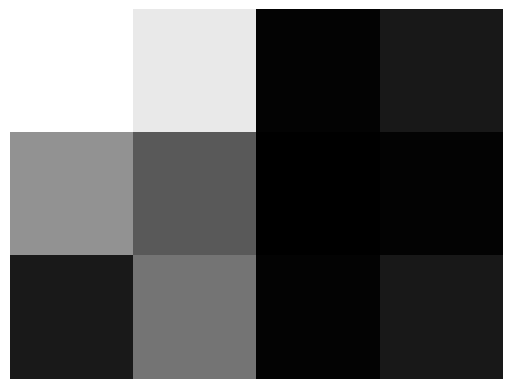

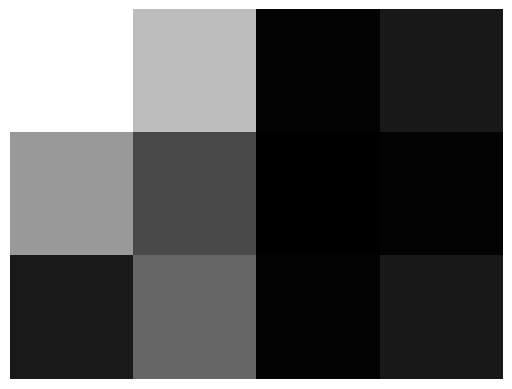

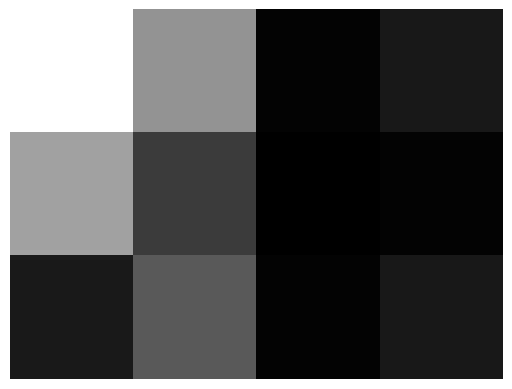

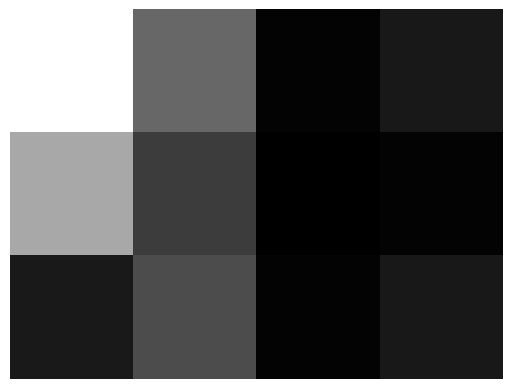

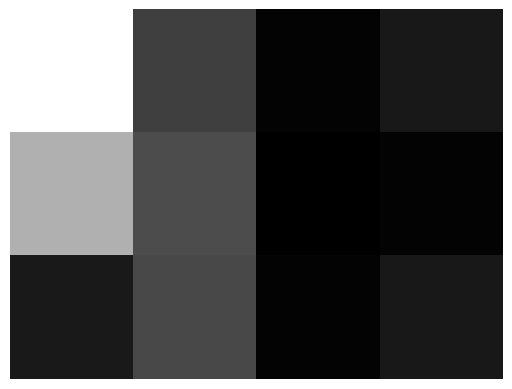

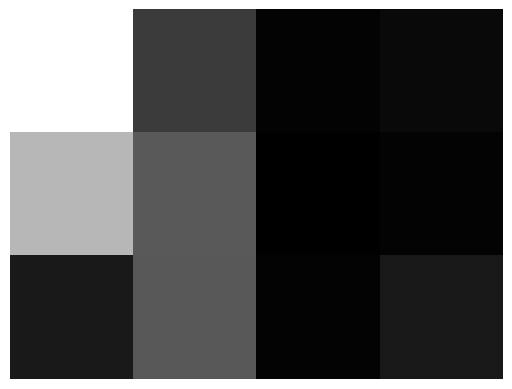

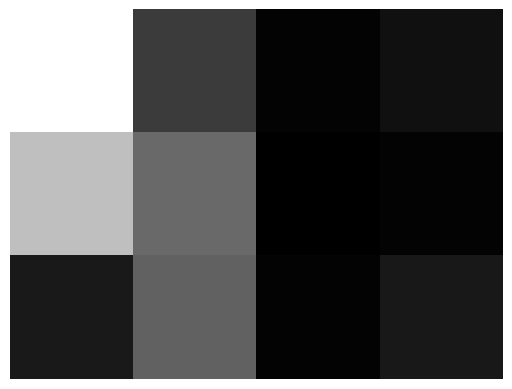

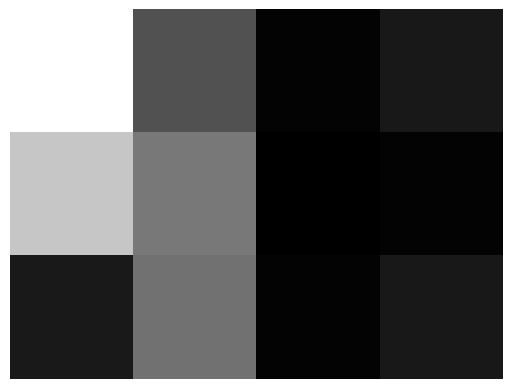

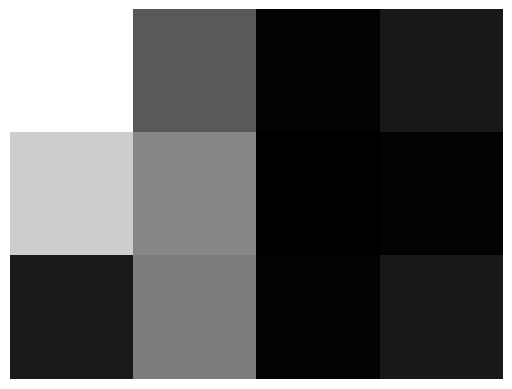

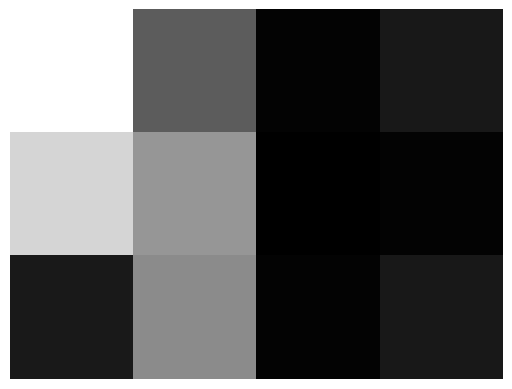

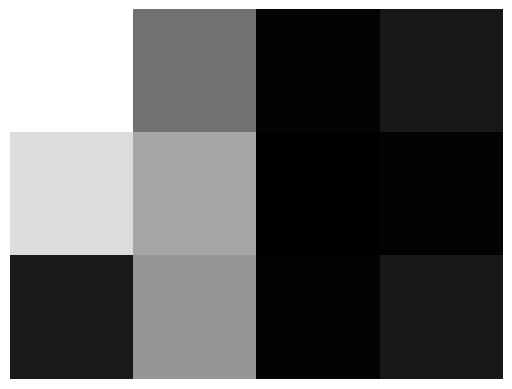

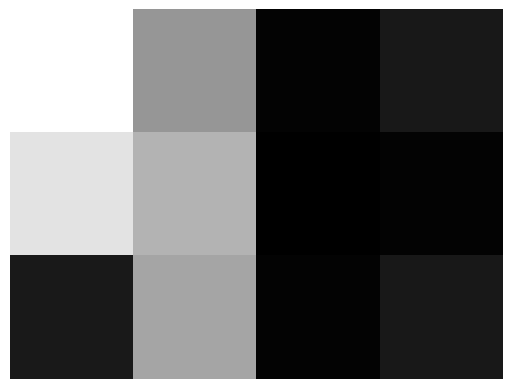

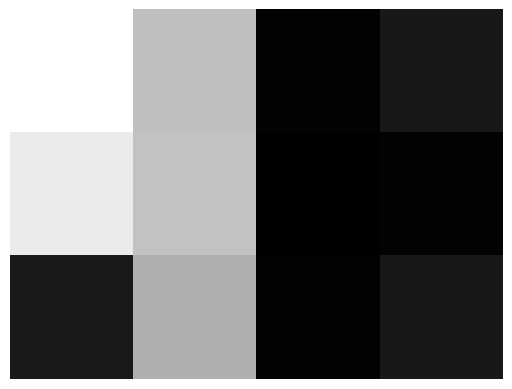

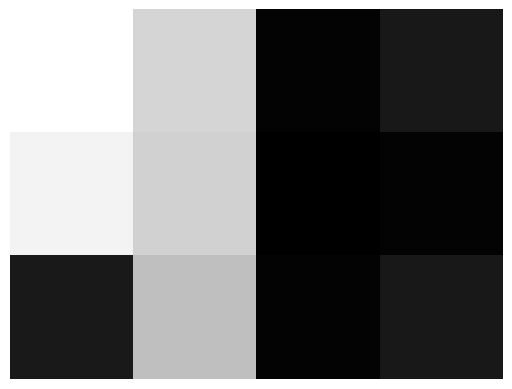

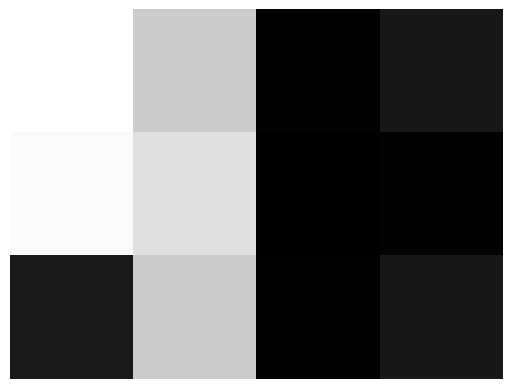

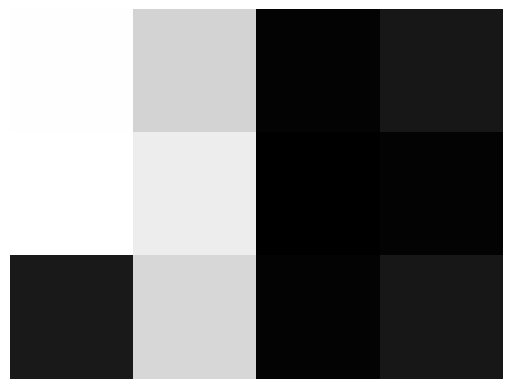

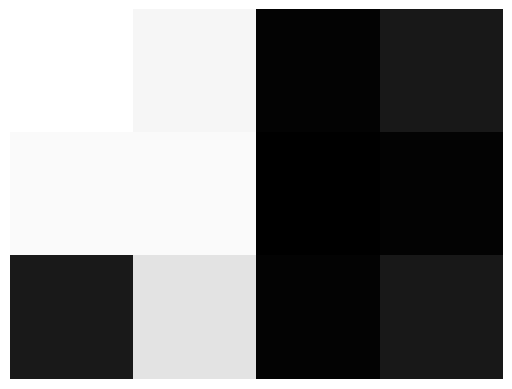

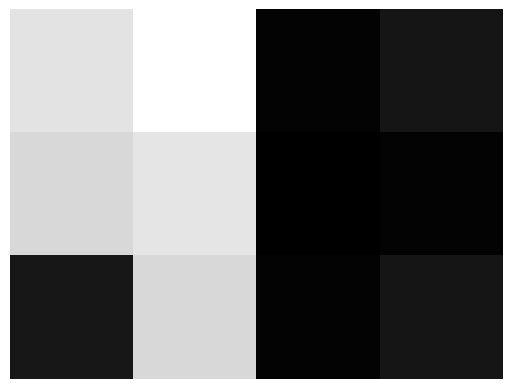

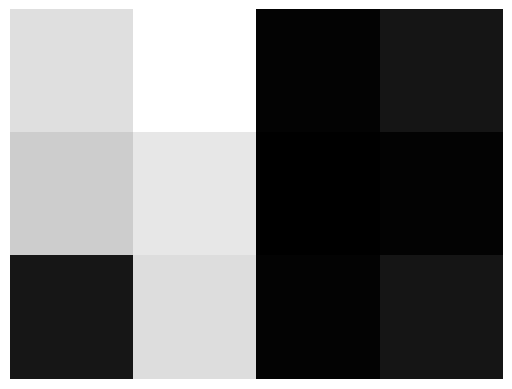

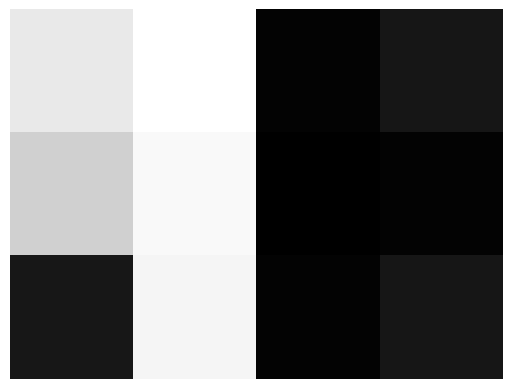

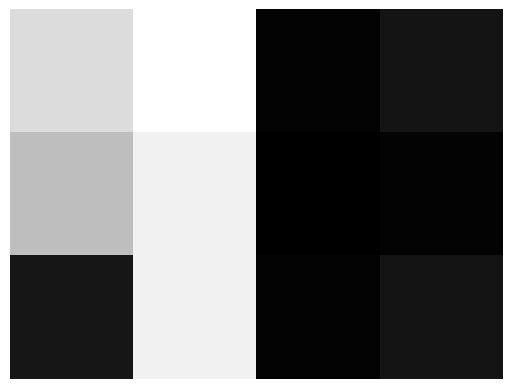

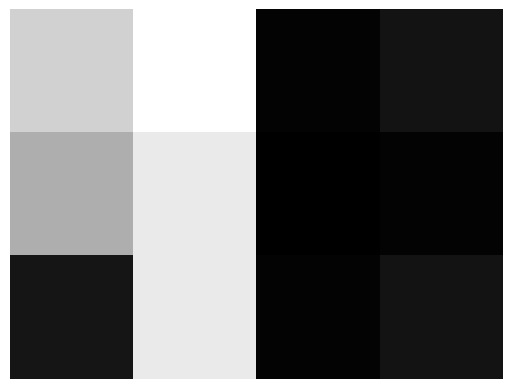

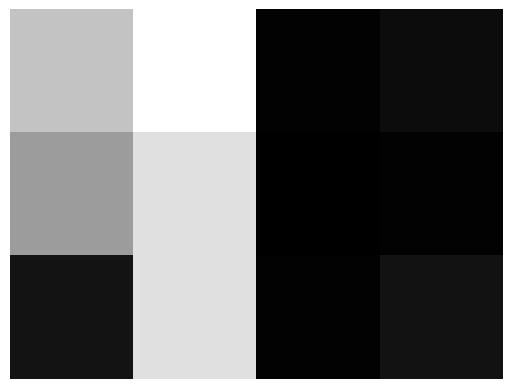

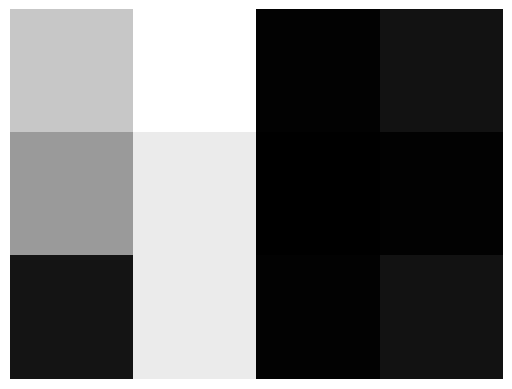

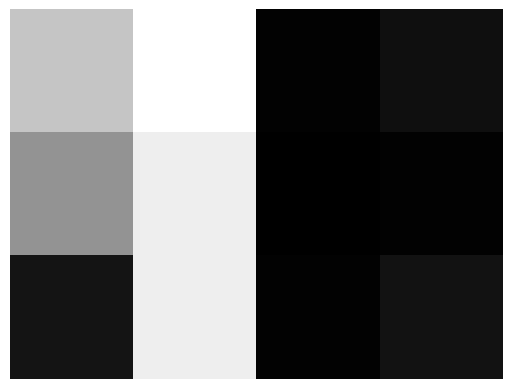

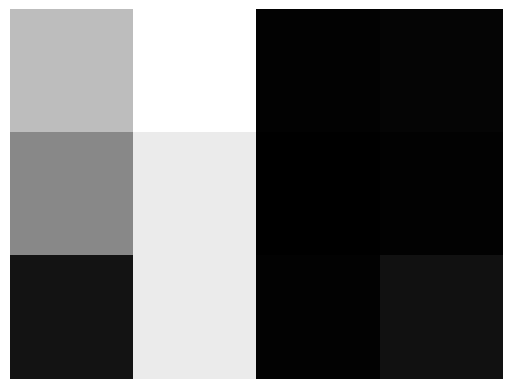

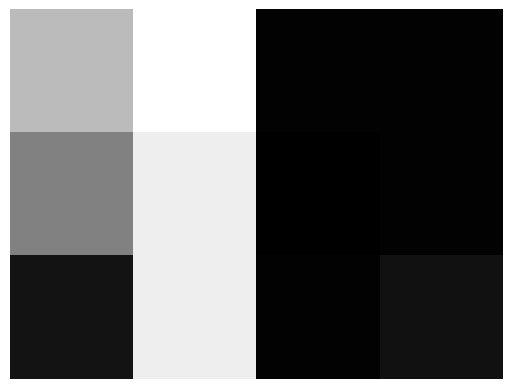

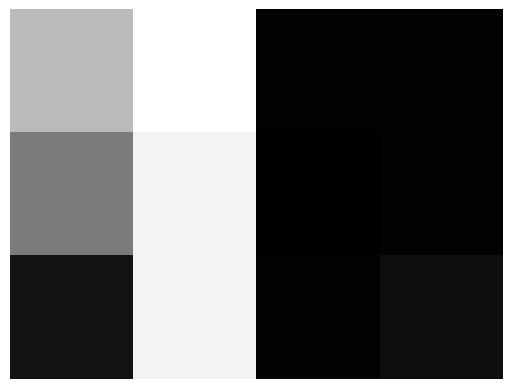

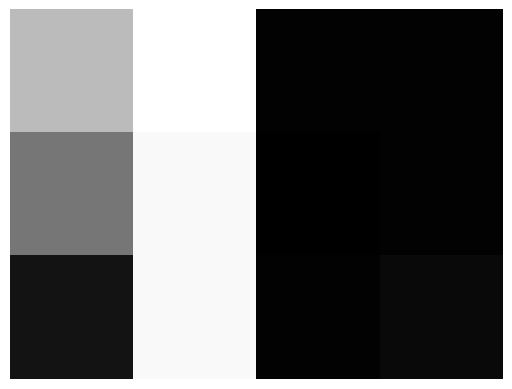

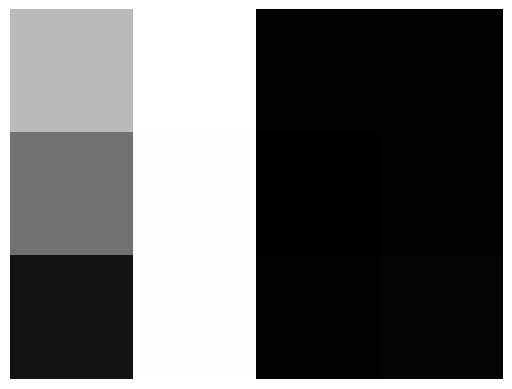

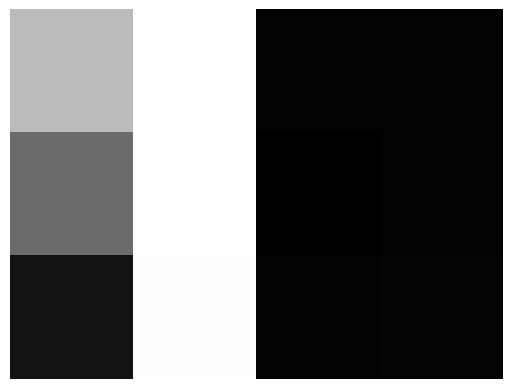

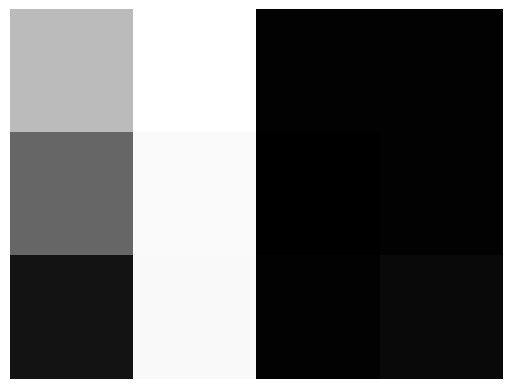

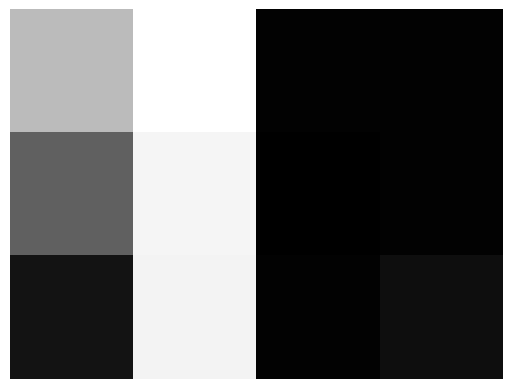

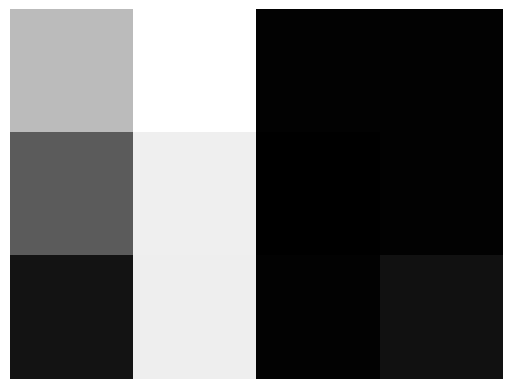

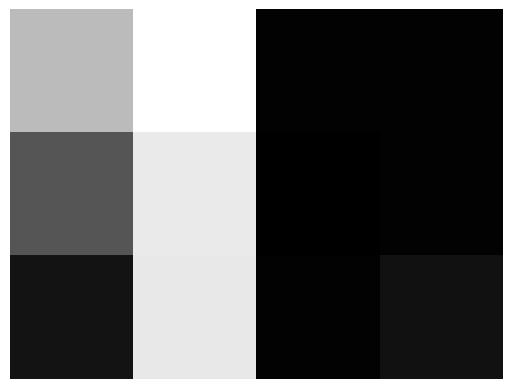

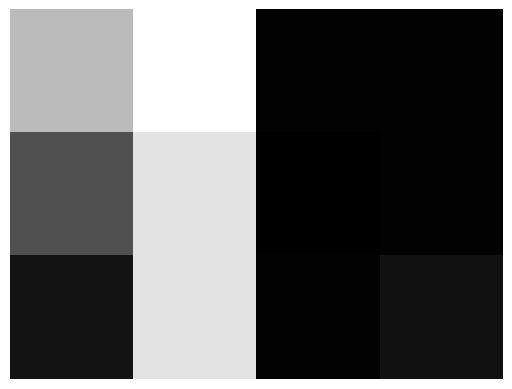

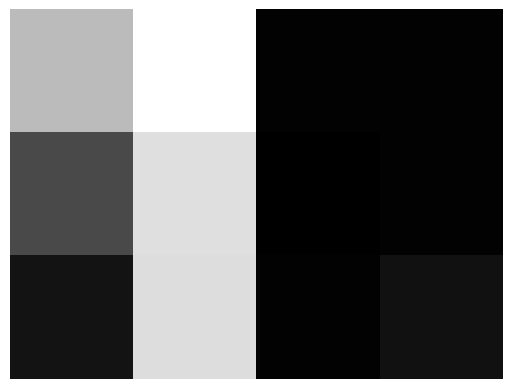

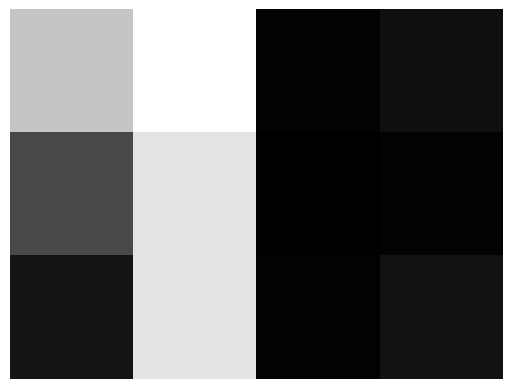

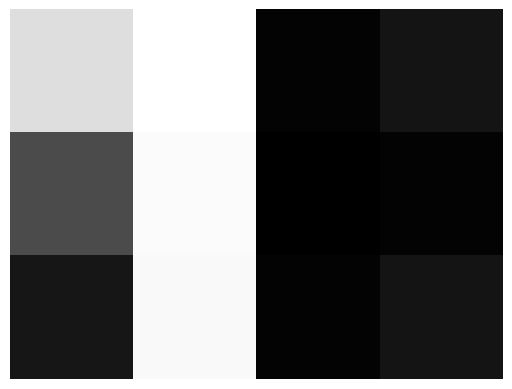

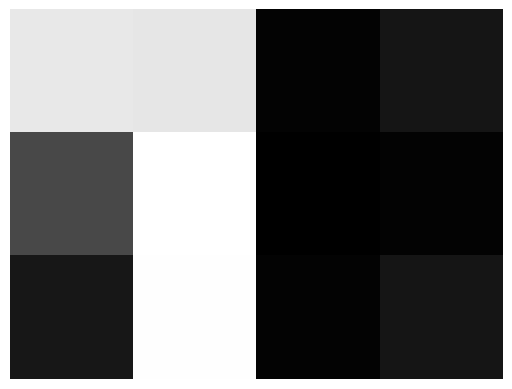

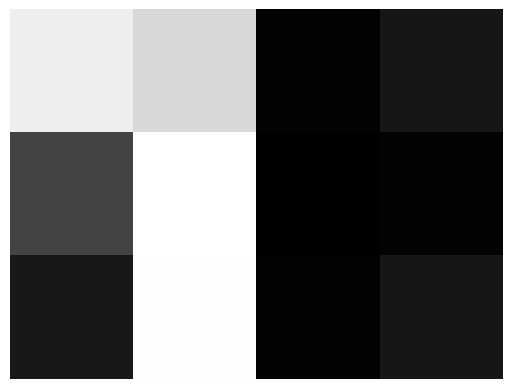

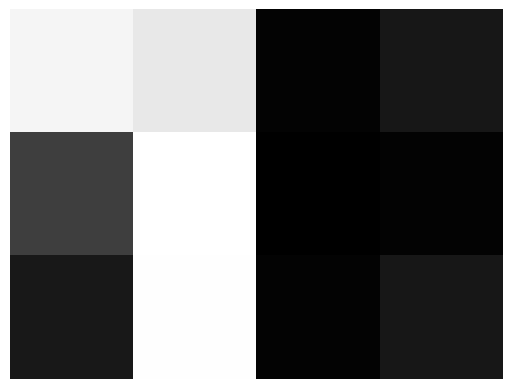

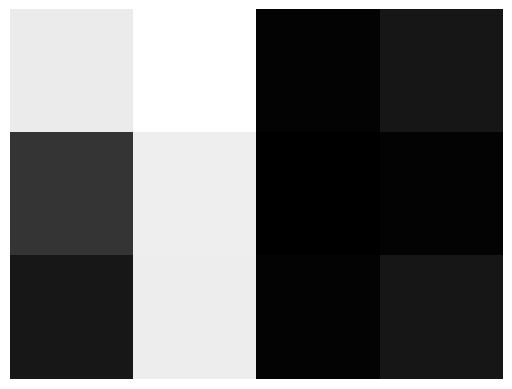

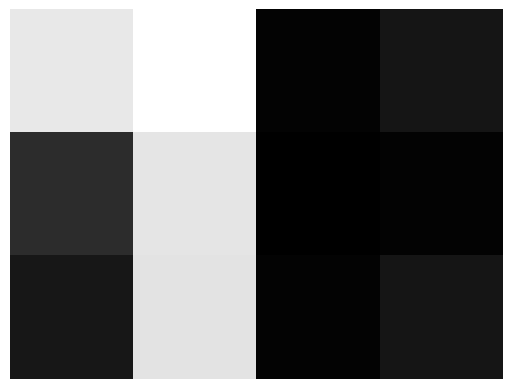

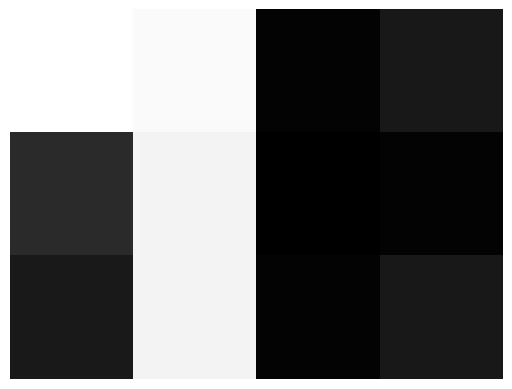

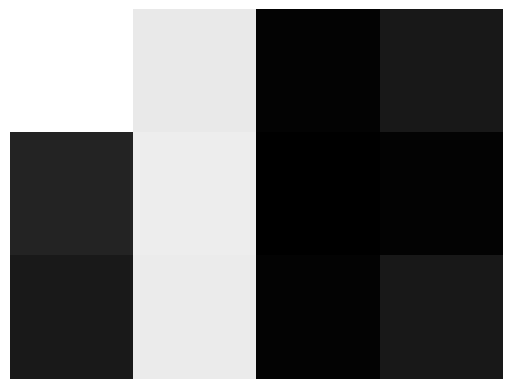

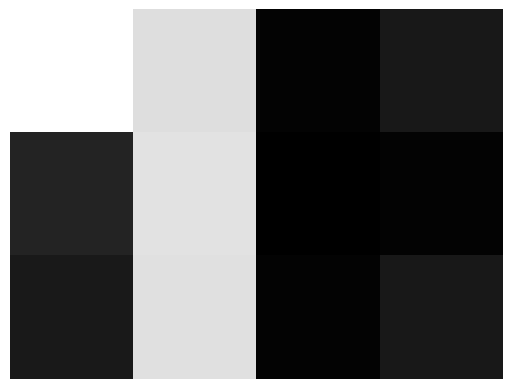

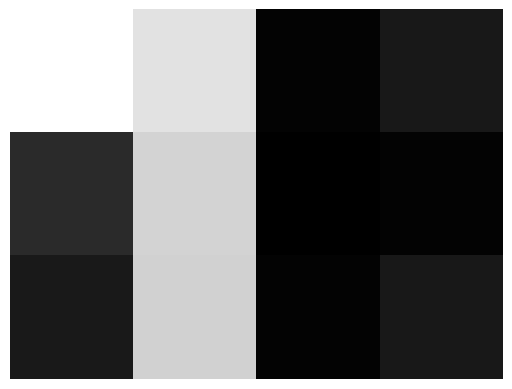

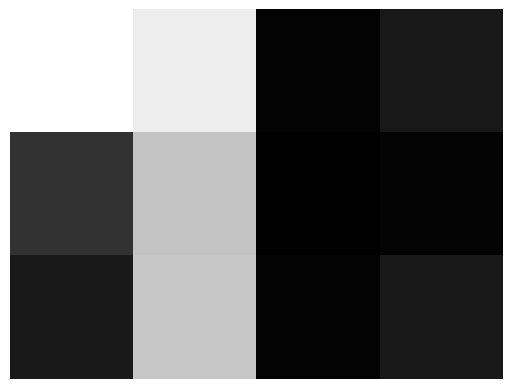

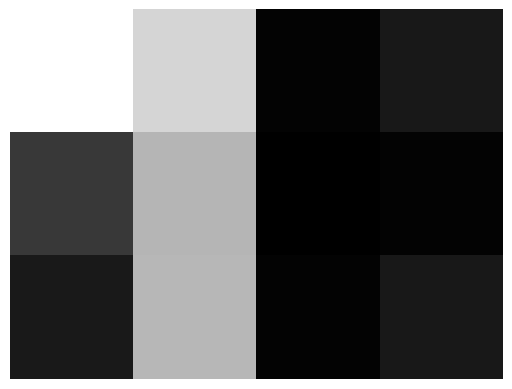

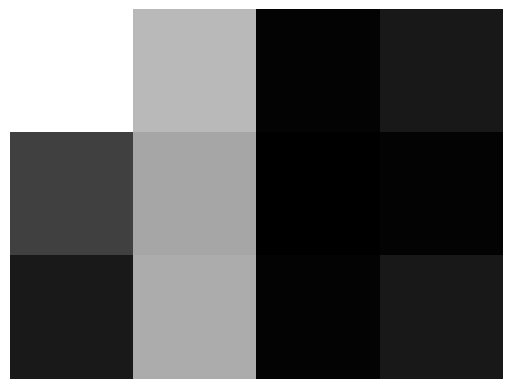

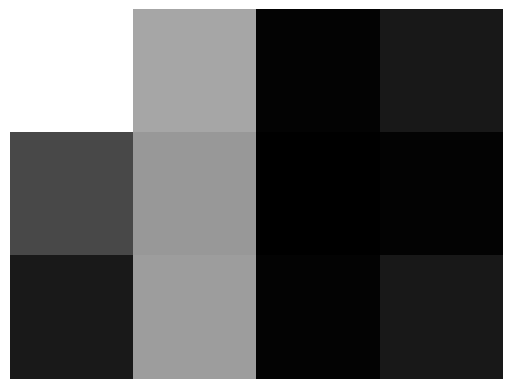

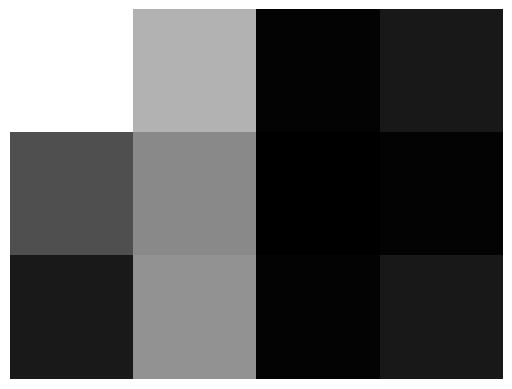

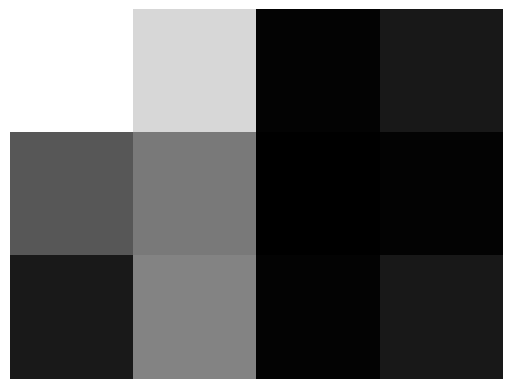

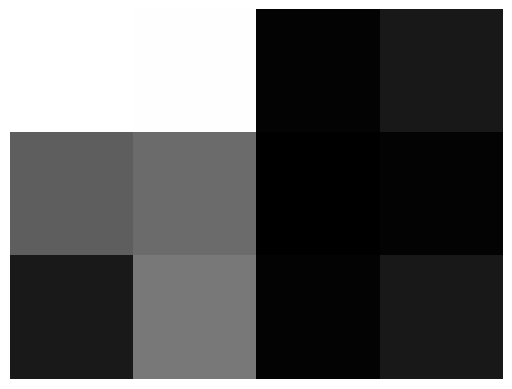

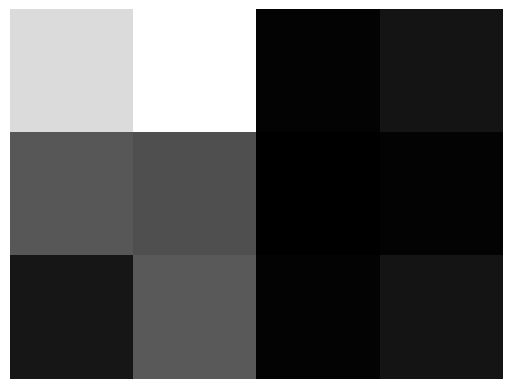

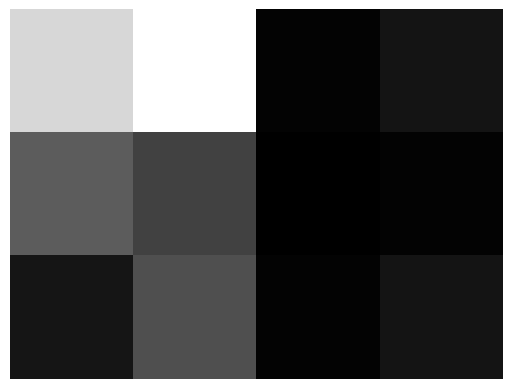

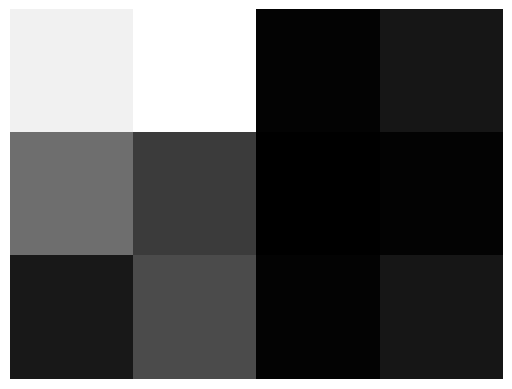

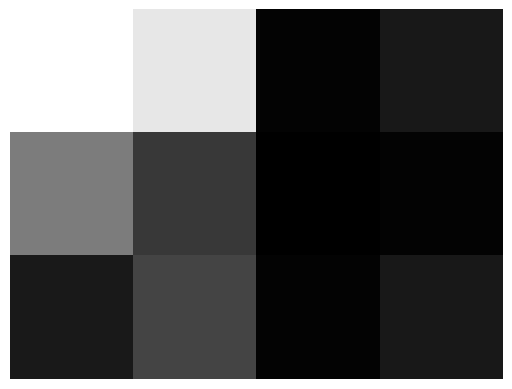

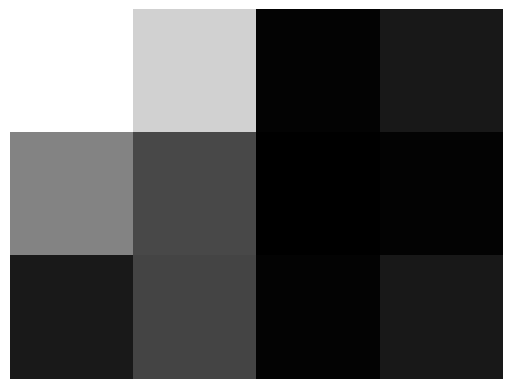

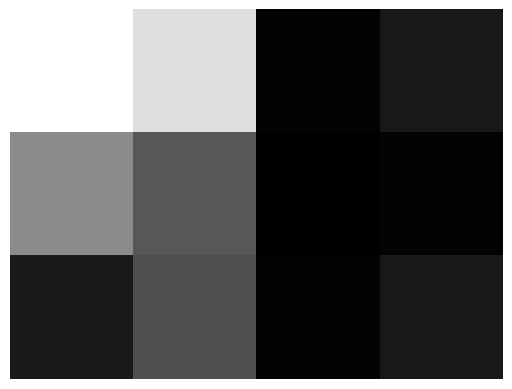

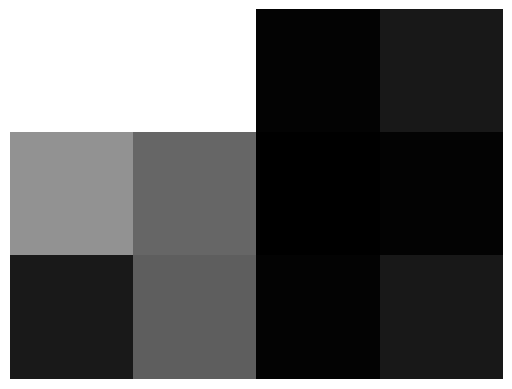

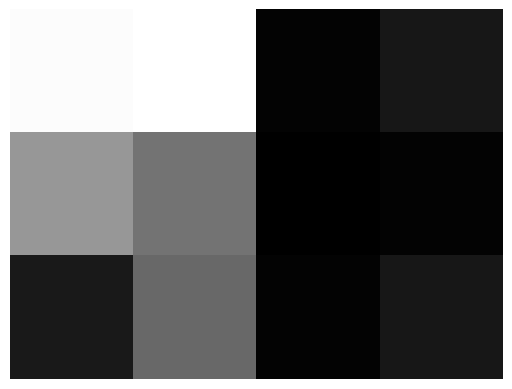

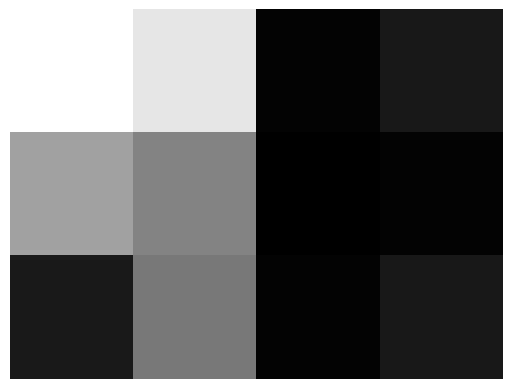

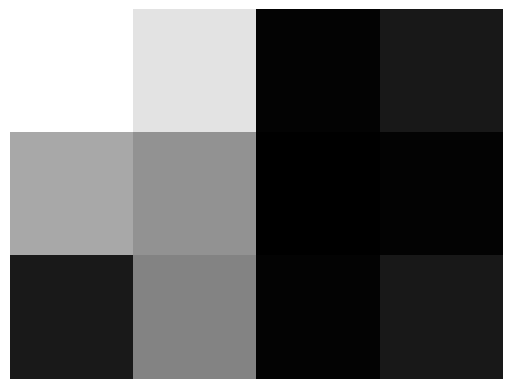

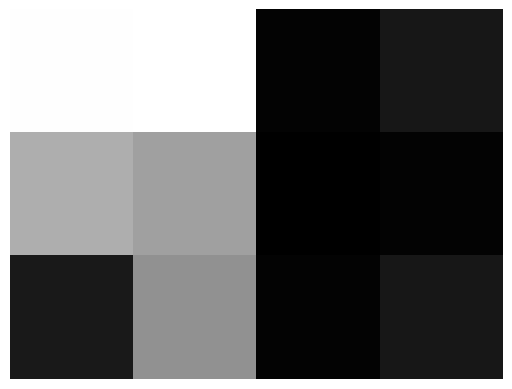

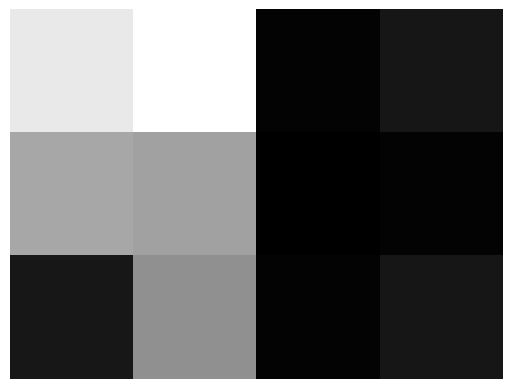

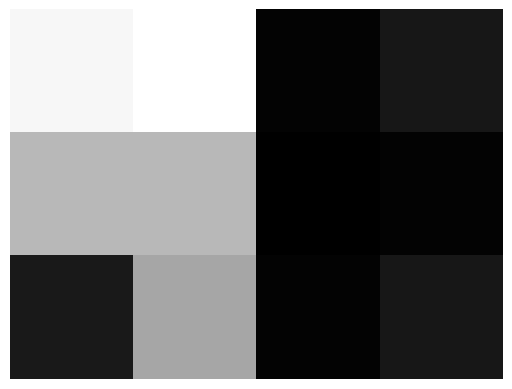

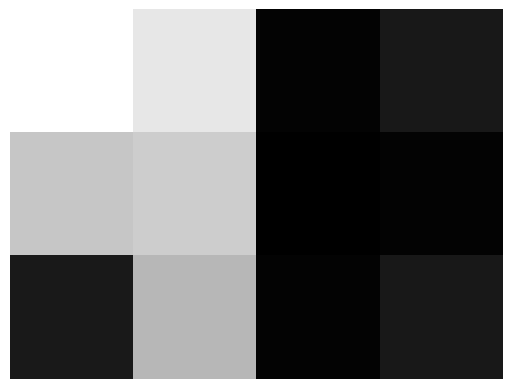

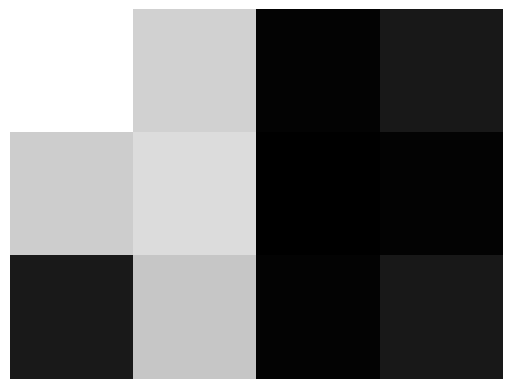

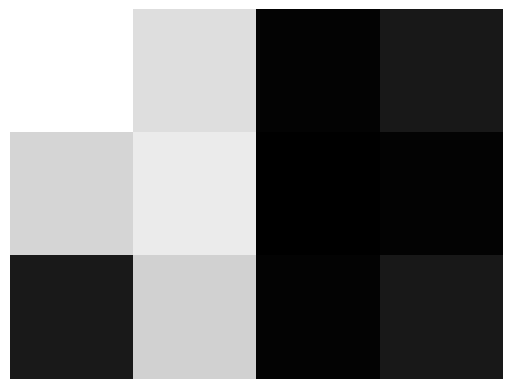

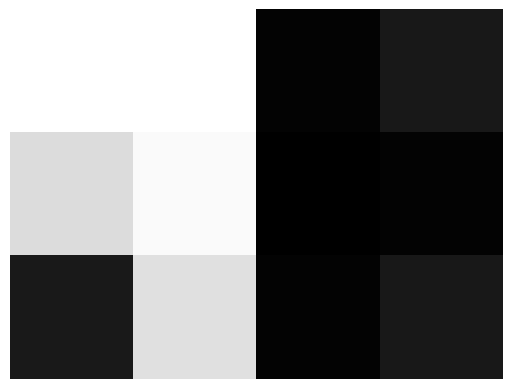

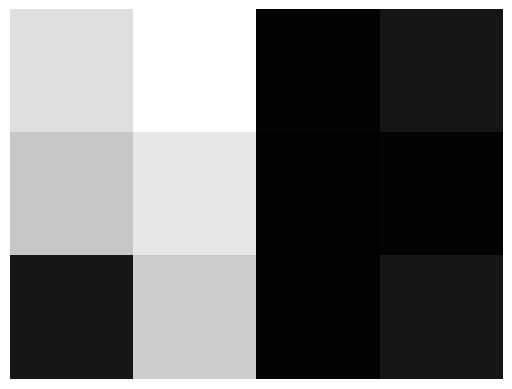

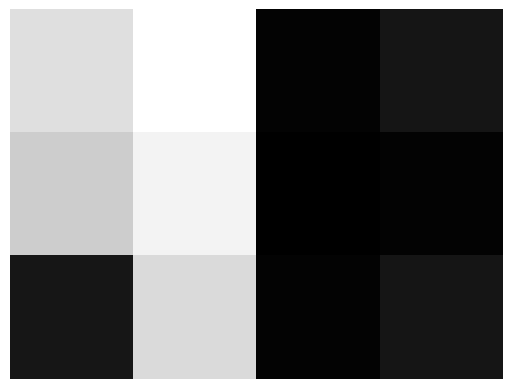

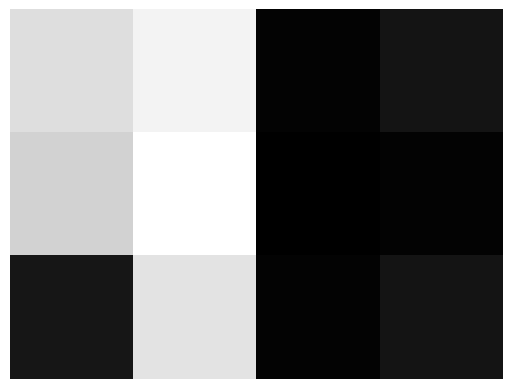

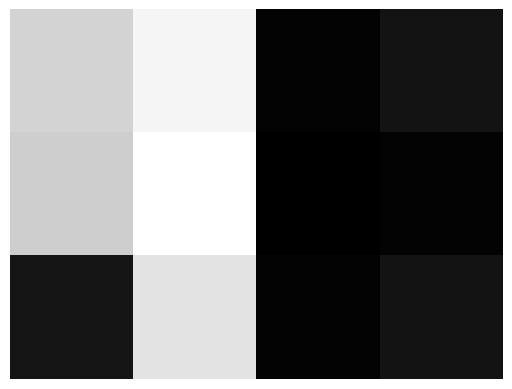

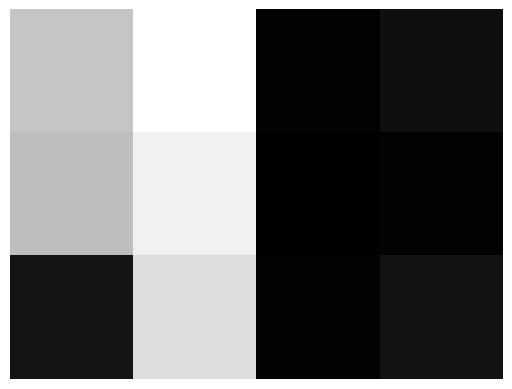

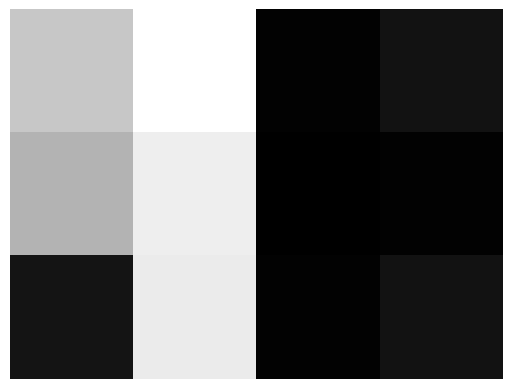

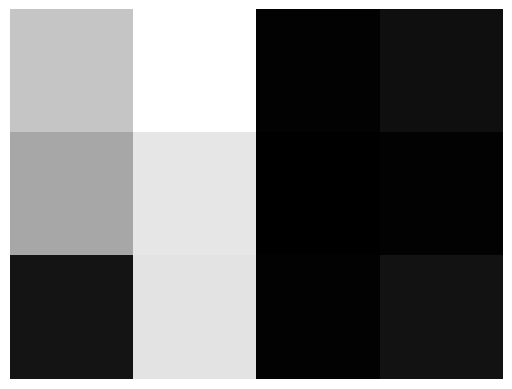

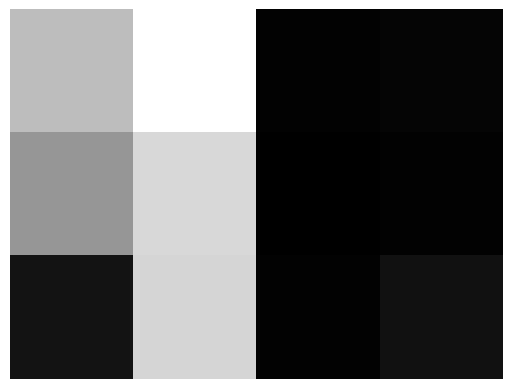

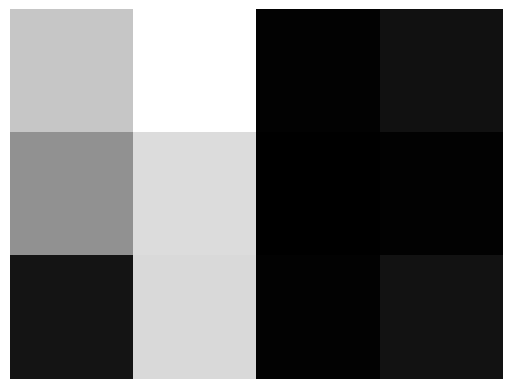

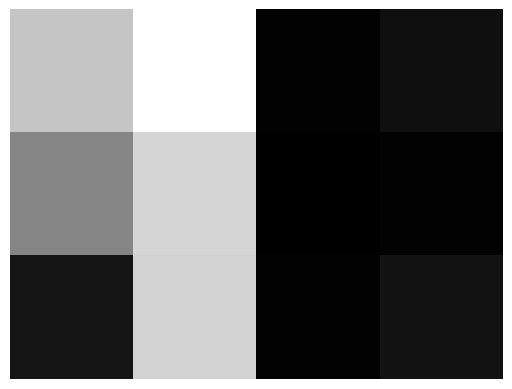

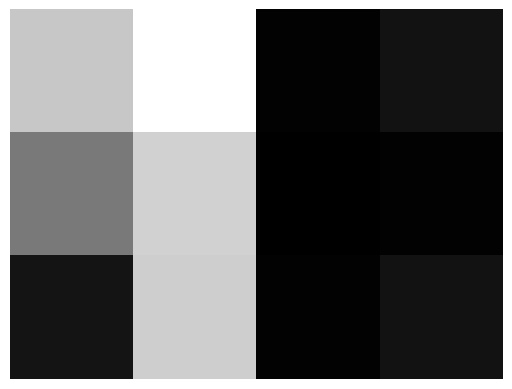

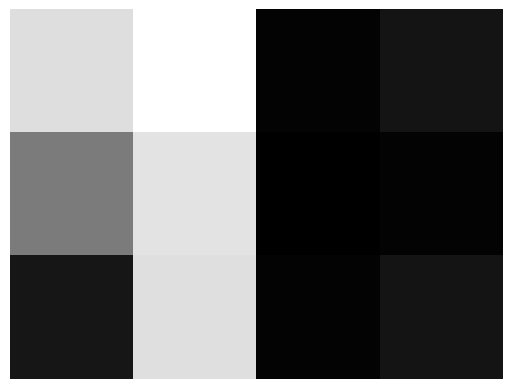

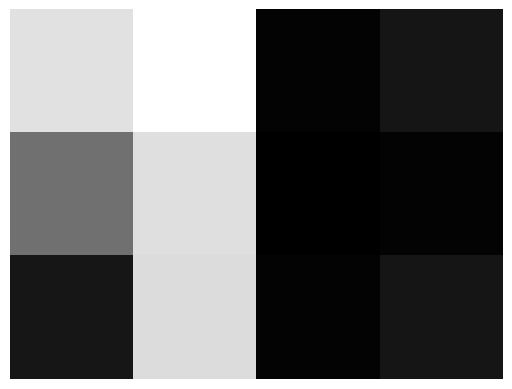

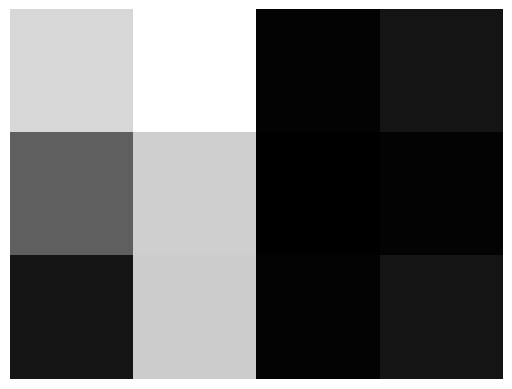

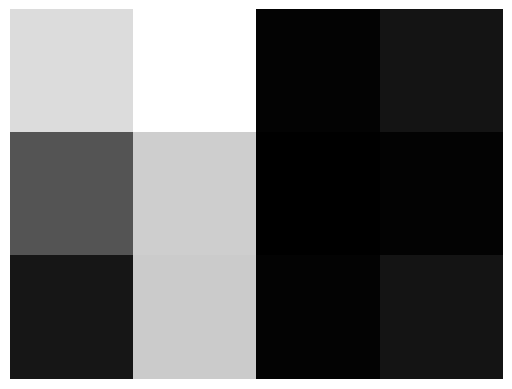

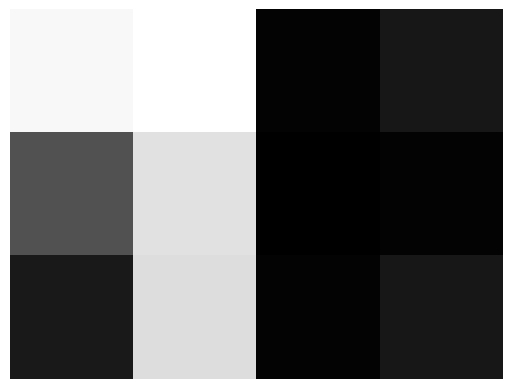

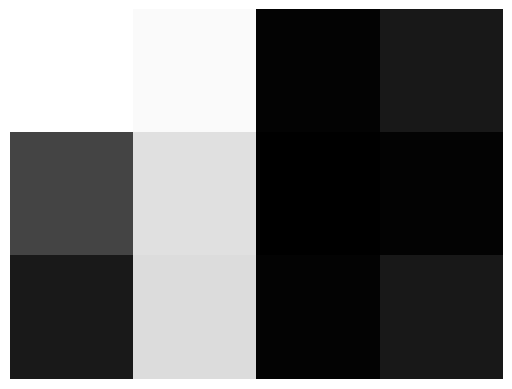

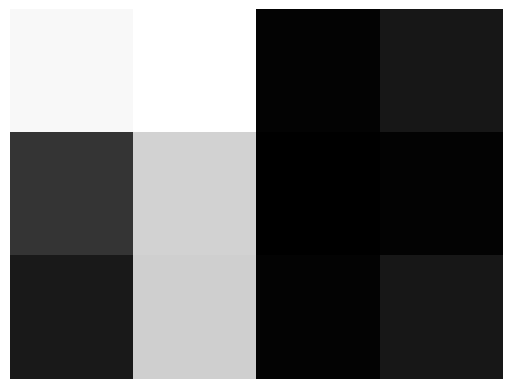

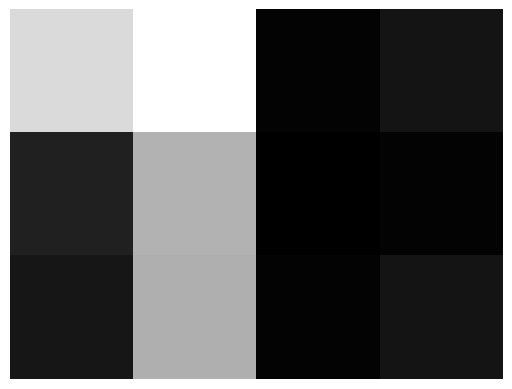

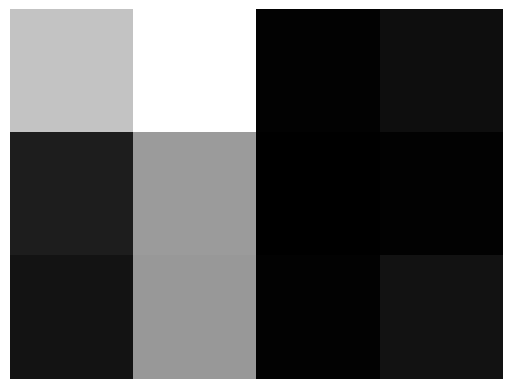

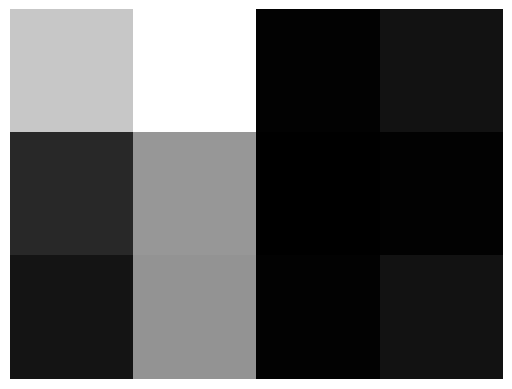

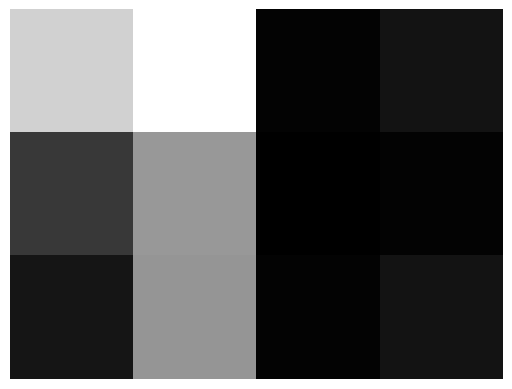

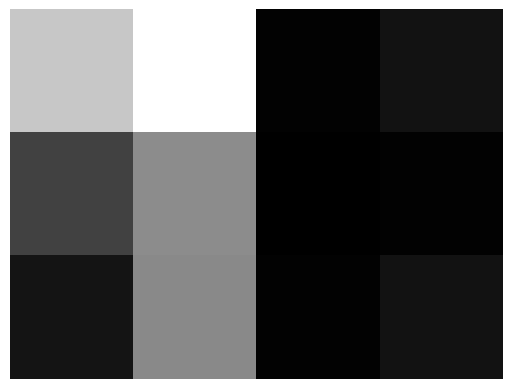

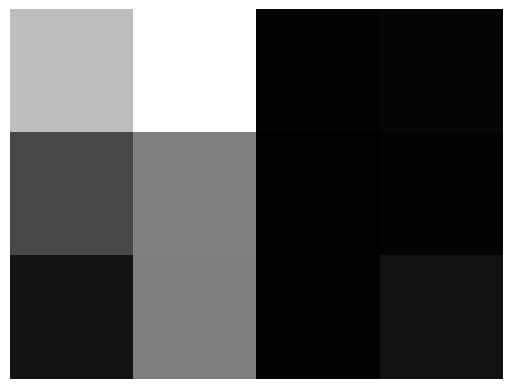

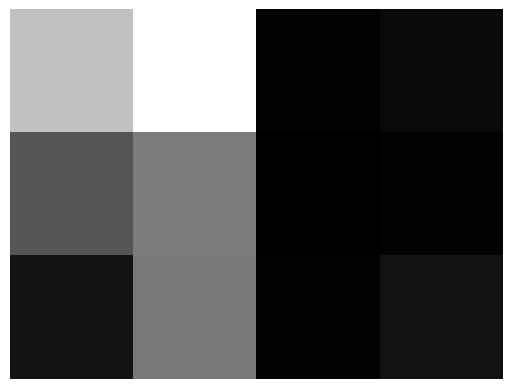

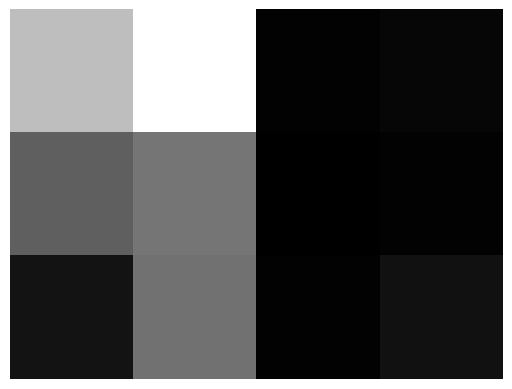

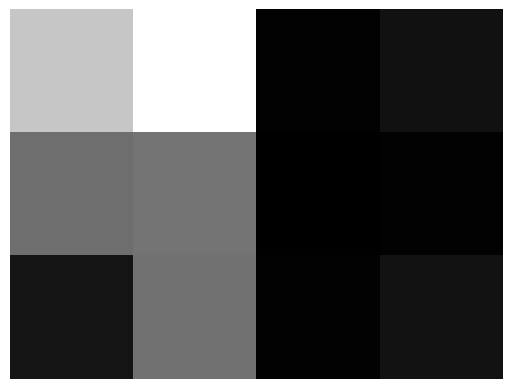

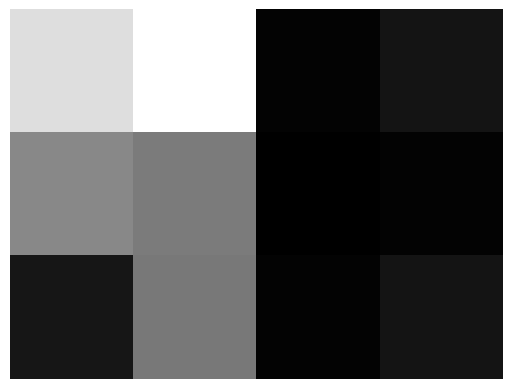

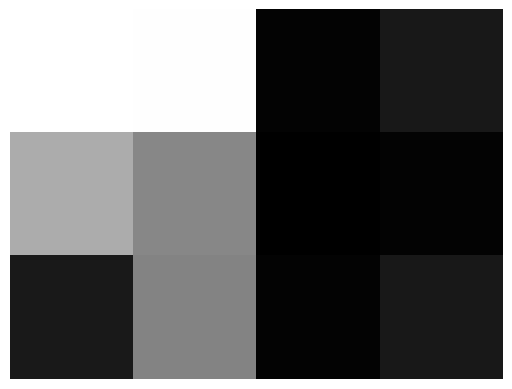

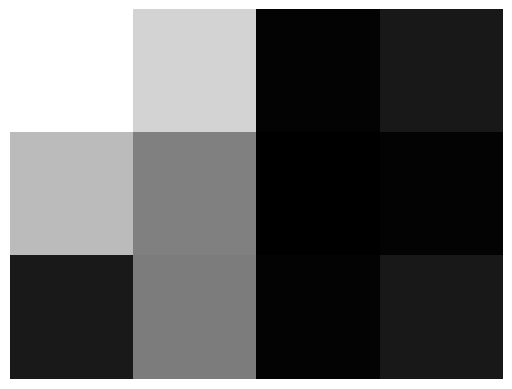

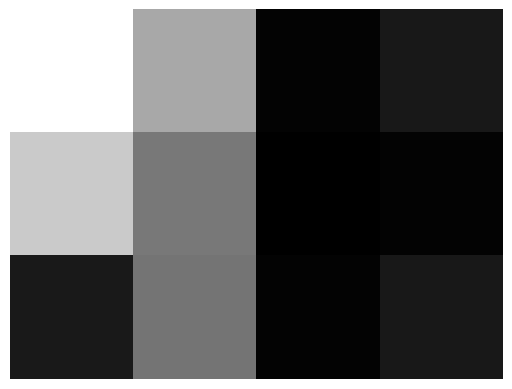

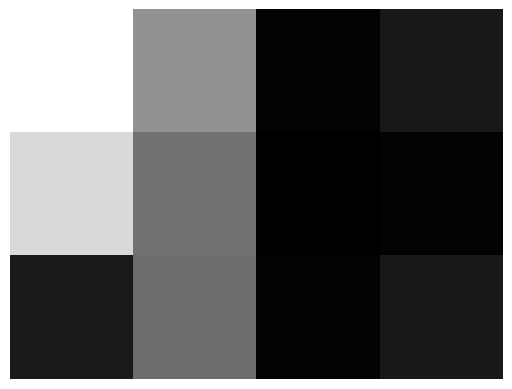

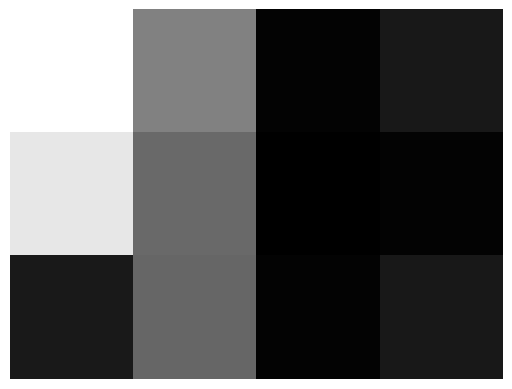

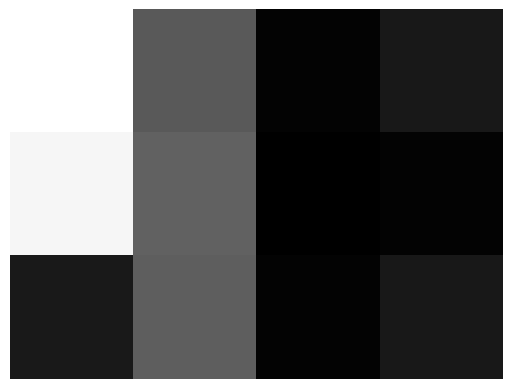

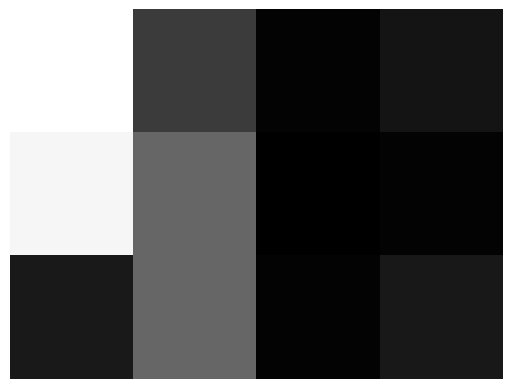

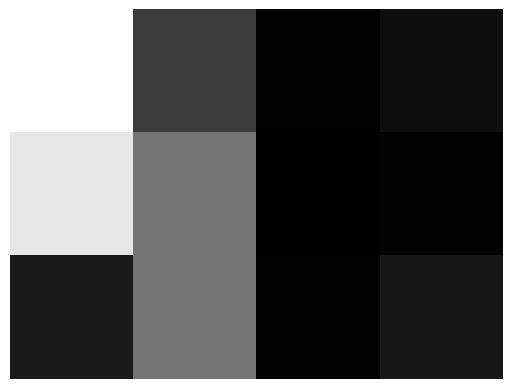

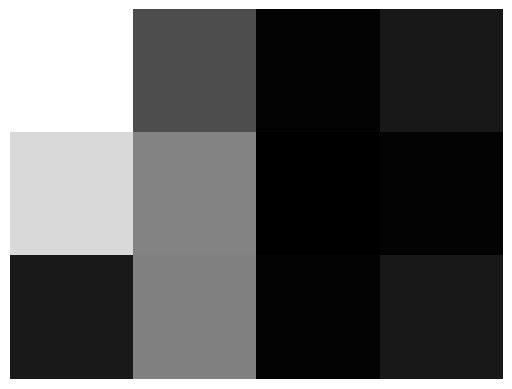

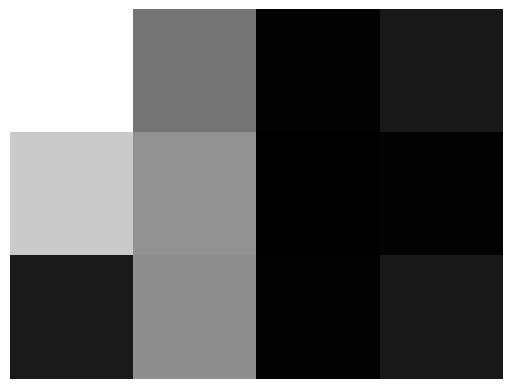

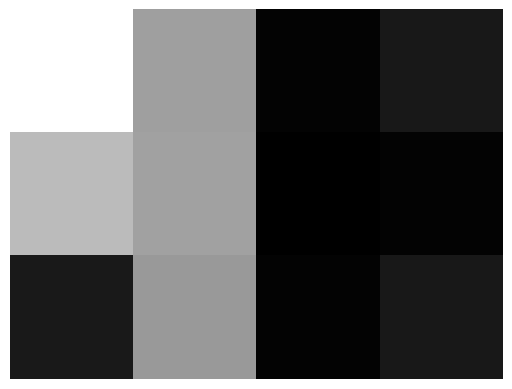

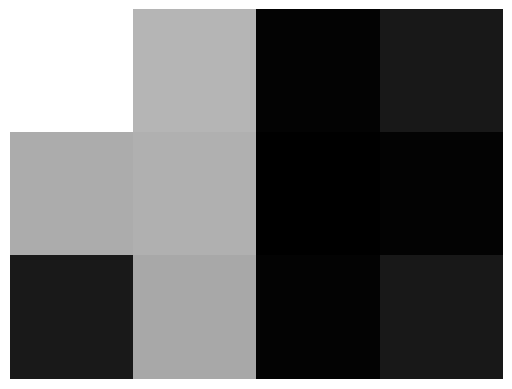

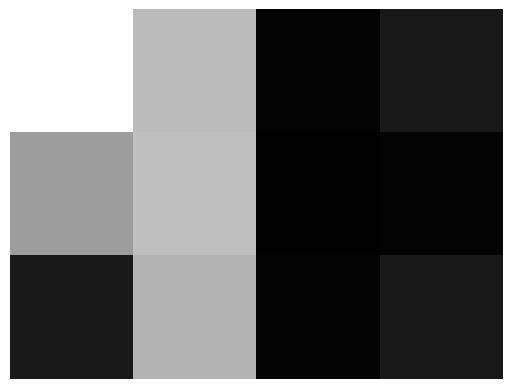

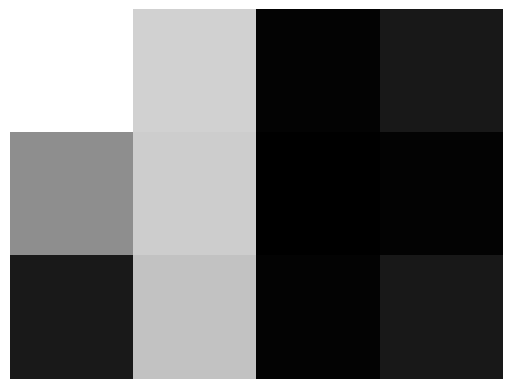

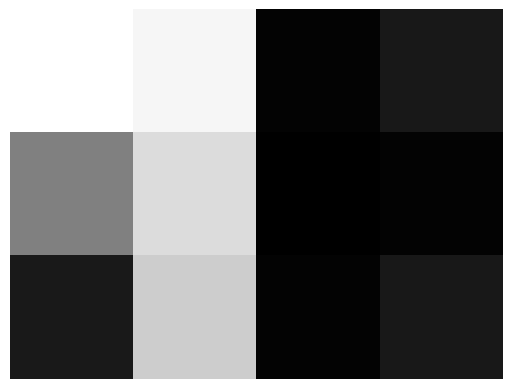

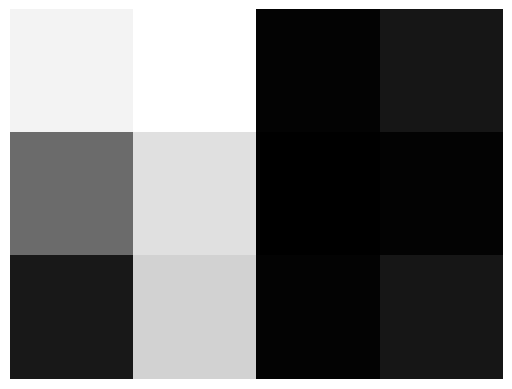

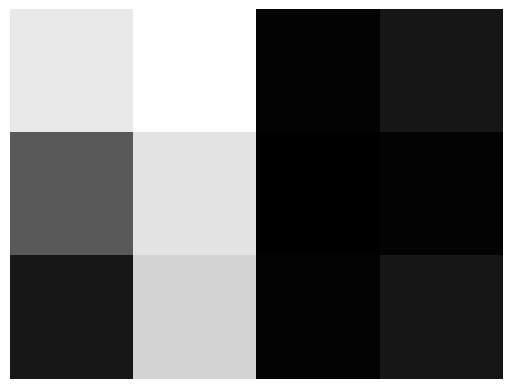

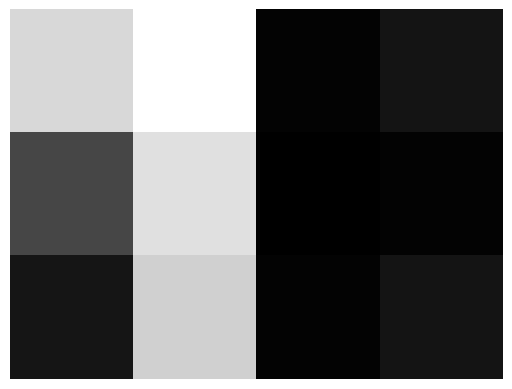

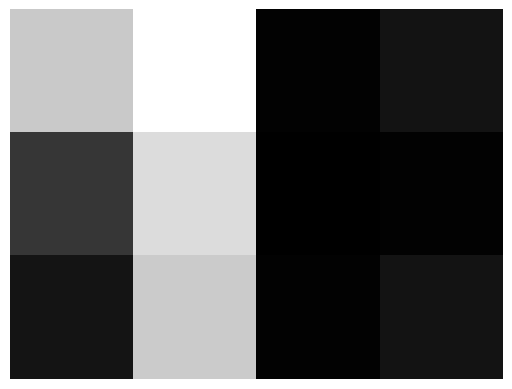

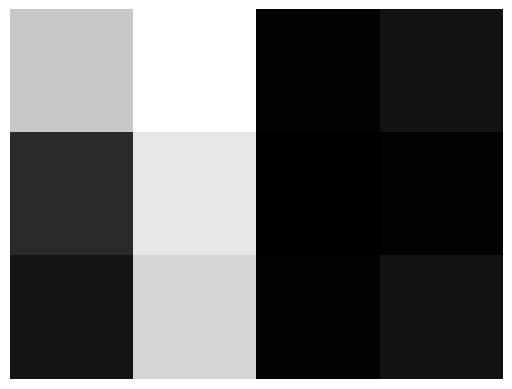

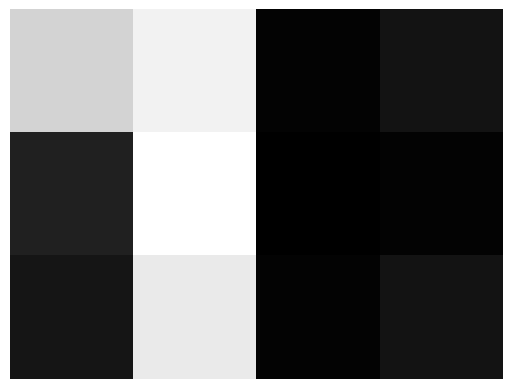

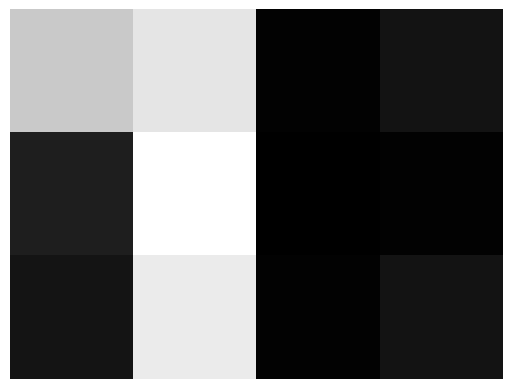

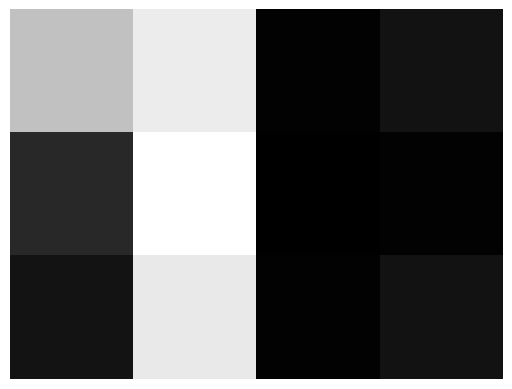

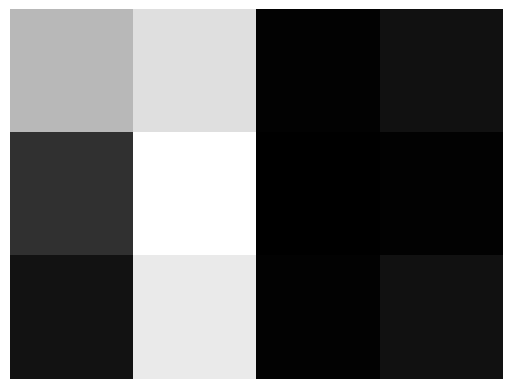

KeyboardInterrupt: 

In [19]:
terminated = truncated = False
while not terminated and not truncated :
    if has_agent:
        obs = torch.from_numpy(obs).to(device)
        obs = obs.unsqueeze(0)
        action, _, _, _ = agent.get_action_and_value(obs)
    else:
        action = env.action_space.sample() # random moves
    obs, reward, terminated, truncated, info = env.step(action)
    
    print_obs(obs[0])

    if terminated or truncated:
        print(f"{env_id} (H): Reward is episode {i} is", crew, f"Length is episode {i} is",info["episode_frame_number"])
        observation, info = env.reset()
        
env.close()